# Bike Sharing in Washington D.C.

Ashley O'Mahony | [ashleyomahony.com](http://ashleyomahony.com) | March 2019  

***

## Introduction

### Objectives

This case study of the Washington D.C Bike Sharing System aims to predict the total number of users on an hourly basis. The dataset is [available on Kaggle](https://www.kaggle.com/marklvl/bike-sharing-dataset/home). It contains usage information of years 2011 and 2012.

All the files of this project are saved in a [GitHub repository](https://github.com/ashomah/Bike-Sharing-in-Washington-DC).

### Libraries

This project uses a set of libraries for data manipulation, ploting and modelling.

In [1]:
# Loading Libraries
import pandas as pd #Data Manipulation - version 0.23.4
pd.set_option('display.max_columns', 500)
import numpy as np #Data Manipulation - version 1.15.4
import datetime

import matplotlib.pyplot as plt #Plotting - version 3.0.2
import matplotlib.ticker as ticker #Plotting - version 3.0.2
import seaborn as sns #Plotting - version 0.9.0
sns.set(style='white')

from sklearn import preprocessing #Preprocessing - version 0.20.1
from sklearn.preprocessing import MinMaxScaler #Preprocessing - version 0.20.1
from sklearn.preprocessing import PolynomialFeatures #Preprocessing - version 0.20.1

from scipy.stats import skew, boxcox_normmax #Preprocessing - version 1.1.0
from scipy.special import boxcox1p #Preprocessing - version 1.1.0
import statsmodels.api as sm #Outliers detection - version 0.9.0

from sklearn.model_selection import train_test_split #Train/Test Split - version 0.20.1
from sklearn.model_selection import TimeSeriesSplit,cross_validate #Timeseries CV - version 0.20.1
from sklearn import datasets, linear_model #Model - version 0.20.1
from sklearn.linear_model import LinearRegression #Model - version 0.20.1

from sklearn.metrics import mean_squared_error, r2_score #Metrics - version 0.20.1
from sklearn.metrics import accuracy_score #Metrics - version 0.20.1
from sklearn.model_selection import cross_val_score, cross_val_predict # CV - version 0.20.1
from sklearn.feature_selection import RFE #Feature Selection - version 0.20.1

### Data Loading

The dataset is stored in the [GitHub repository](https://github.com/ashomah/Bike-Sharing-in-Washington-DC) consisting in two CSV file: `day.csv` and `hour.csv`. The files are loaded directly from the repository.

In [2]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/ashomah/Bike-Sharing-in-Washington-DC/master/Bike-Sharing-Dataset/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
days_df = pd.read_csv("https://raw.githubusercontent.com/ashomah/Bike-Sharing-in-Washington-DC/master/Bike-Sharing-Dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Data Preparation

### Variables Types and Definitions

The first stage of this analysis is to describe the dataset, understand the meaning of variable and perform the necessary adjustments to ensure that the data will be proceeded correctly during the Machine Learning process.

In [4]:
# Shape of the data frame
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('hour.csv:', hours_df.shape[0],'rows |', hours_df.shape[1], 'columns'))
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('day.csv:', days_df.shape[0],'rows |', days_df.shape[1], 'columns'))

hour.csv:  17379 rows |  17 columns
day.csv:     731 rows |  16 columns


In [5]:
# Describe each variable
def df_desc(df):
    import pandas as pd
    desc = pd.DataFrame({'dtype': df.dtypes,
                         'NAs': df.isna().sum(),
                         'Numerical': (df.dtypes != 'object') & (df.dtypes != 'datetime64[ns]') & (df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() != len(df)),
                         'Boolean': df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() == len(df),
                         'Categorical': df.dtypes == 'object',
                         'Date': df.dtypes == 'datetime64[ns]',
                        })
    return desc

In [6]:
df_desc(days_df)

,dtype,NAs,Numerical,Boolean,Categorical,Date
instant,int64,0,True,False,False,False
dteday,object,0,False,False,True,False
season,int64,0,True,False,False,False
yr,int64,0,False,True,False,False
mnth,int64,0,True,False,False,False
holiday,int64,0,False,True,False,False
weekday,int64,0,True,False,False,False
workingday,int64,0,False,True,False,False
weathersit,int64,0,True,False,False,False
temp,float64,0,True,False,False,False


In [7]:
df_desc(hours_df)

,dtype,NAs,Numerical,Boolean,Categorical,Date
instant,int64,0,True,False,False,False
dteday,object,0,False,False,True,False
season,int64,0,True,False,False,False
yr,int64,0,False,True,False,False
mnth,int64,0,True,False,False,False
hr,int64,0,True,False,False,False
holiday,int64,0,False,True,False,False
weekday,int64,0,True,False,False,False
workingday,int64,0,False,True,False,False
weathersit,int64,0,True,False,False,False


The dataset `day.csv` consists in 731 rows and 16 columns. The dataset `hour.csv` consists in 17,379 rows and 17 columns. Both datasets have the same columns, with an additional column for hours in `hour.csv`.

Each row provides information for each day or each hour. None of the attributes contains any NA. Four (4) of these attributes contain decimal numbers, nine (9) contain integers, three (3) contain booleans, and one (1) contains date values stored as string.

For better readability, the columns of both data frames are renamed and data types are adjusted.

In [8]:
# HOURS DATASET
# Renaming columns names to more readable names
hours_df.rename(columns={'instant':'id',
                        'dteday':'date',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_bikes',
                        'hr':'hour',
                        'yr':'year',
                        'temp':'actual_temp',
                        'atemp':'feeling_temp'},
                inplace=True)

# Date time conversion
hours_df.date = pd.to_datetime(hours_df.date, format='%Y-%m-%d')

# Categorical variables
for column in ['season', 'holiday', 'weekday', 'workingday', 'weather_condition','month', 'year','hour']:
    hours_df[column] = hours_df[column].astype('category')
    
# DAYS DATASET
# Renaming columns names to more readable names
days_df.rename(columns={'instant':'id',
                        'dteday':'date',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_bikes',
                        'yr':'year',
                        'temp':'actual_temp',
                        'atemp':'feeling_temp'},
               inplace=True)

# Date time conversion
days_df.date = pd.to_datetime(days_df.date, format='%Y-%m-%d')

# Categorical variables
for column in ['season', 'holiday', 'weekday', 'workingday', 'weather_condition','month', 'year']:
    days_df[column] = days_df[column].astype('category')

In [9]:
hours_df.head()

,id,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,actual_temp,feeling_temp,humidity,windspeed,casual,registered,total_bikes
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hours_df.describe()

,id,actual_temp,feeling_temp,humidity,windspeed,casual,registered,total_bikes
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Lists values of categorical variables
categories = {'season': hours_df['season'].unique().tolist(),
              'year':hours_df['year'].unique().tolist(),
              'month':hours_df['month'].unique().tolist(),
              'hour':hours_df['hour'].unique().tolist(),
              'holiday':hours_df['holiday'].unique().tolist(),
              'weekday':hours_df['weekday'].unique().tolist(),
              'workingday':hours_df['workingday'].unique().tolist(),
              'weather_condition':hours_df['weather_condition'].unique().tolist(),
             }
for i in sorted(categories.keys()):
    print(i+":")
    print(categories[i])
    if i != sorted(categories.keys())[-1] :print()

holiday:
[0, 1]

hour:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

month:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

season:
[1, 2, 3, 4]

weather_condition:
[1, 2, 3, 4]

weekday:
[6, 0, 1, 2, 3, 4, 5]

workingday:
[0, 1]

year:
[0, 1]


In [12]:
df_desc(hours_df)

,dtype,NAs,Numerical,Boolean,Categorical,Date
id,int64,0,True,False,False,False
date,datetime64[ns],0,False,False,False,True
season,category,0,True,False,False,False
year,category,0,False,True,False,False
month,category,0,True,False,False,False
hour,category,0,True,False,False,False
holiday,category,0,False,True,False,False
weekday,category,0,True,False,False,False
workingday,category,0,False,True,False,False
weather_condition,category,0,True,False,False,False


In [13]:
days_df.head()

,id,date,season,year,month,holiday,weekday,workingday,weather_condition,actual_temp,feeling_temp,humidity,windspeed,casual,registered,total_bikes
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
days_df.describe()

,id,actual_temp,feeling_temp,humidity,windspeed,casual,registered,total_bikes
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
# Lists values of categorical variables
categories = {'season': days_df['season'].unique().tolist(),
              'year':days_df['year'].unique().tolist(),
              'month':days_df['month'].unique().tolist(),
              'holiday':days_df['holiday'].unique().tolist(),
              'weekday':days_df['weekday'].unique().tolist(),
              'workingday':days_df['workingday'].unique().tolist(),
              'weather_condition':days_df['weather_condition'].unique().tolist(),
             }
for i in sorted(categories.keys()):
    print(i+":")
    print(categories[i])
    if i != sorted(categories.keys())[-1] :print()

holiday:
[0, 1]

month:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

season:
[1, 2, 3, 4]

weather_condition:
[2, 1, 3]

weekday:
[6, 0, 1, 2, 3, 4, 5]

workingday:
[0, 1]

year:
[0, 1]


In [16]:
df_desc(days_df)

,dtype,NAs,Numerical,Boolean,Categorical,Date
id,int64,0,True,False,False,False
date,datetime64[ns],0,False,False,False,True
season,category,0,True,False,False,False
year,category,0,False,True,False,False
month,category,0,True,False,False,False
holiday,category,0,False,True,False,False
weekday,category,0,True,False,False,False
workingday,category,0,False,True,False,False
weather_condition,category,0,True,False,False,False
actual_temp,float64,0,True,False,False,False


For this study, we will only work with the dataset `hours`. The datasets contain 17 variables with no NAs:

- `id`: numerical, integer values.  
  *Record index. __This variable won't be considered in the study.__*
  
  
- `date`: numerical, date values.  
  *Date.*


- `season`: encoded categorical, integer between 1 and 4.  
  *Season: 2=Spring, 3=Summer, 4=Fall, 1=Winter.*  
  *__Note: the seasons mentioned on the Kaggle page didn't correspond to the real seasons. We readjusted the parameters accordingly.__*


- `year`: encoded categorical, integer between 0 and 1.  
  *Year: 0=2011, 1=2012.*
  
  
- `month`: encoded categorical, integer between 1 and 12.  
  *Month.*
  
  
- `hour`: encoded categorical, integer between 1 and 23.  
  *Hour.*
  
  
- `holiday`: encoded categorical, boolean.  
  *Flag indicating if the day is a holiday.*


- `weekday`: encoded categorical, integer between 0 and 6.  
  *Day of the week (0=Sunday, ... 6=Saturday).*


- `workingday`: encoded categorical, boolean.  
  *Flag indicating if the day is a working day.*
  
  
- `weather_condition`: encoded categorical, integer between 1 and 4.  
  *Weather condition (1=Clear, 2=Mist, 3=Light Rain, 4=Heavy Rain).*


- `actual_temp`: numerical, decimal values between 0 and 1.  
  *Normalized temperature in Celsius (min = -16, max = +50).*


- `feeling_temp`: numerical, decimal values between 0 and 1.  
  *Normalized feeling temperature in Celsius (min = -8, max = +39).*


- `humidity`: numerical, decimal values between 0 and 1.  
  *Normalized humidity.*


- `windspeed`: numerical, decimal values between 0 and 1.  
  *Normalized wind speed.*


- `casual`: numerical, integer.  
  *Count of casual users. This variable won't be considered in the study.*


- `registered`: numerical, integer.  
  *Count of registered users. This variable won't be considered in the study.*


- `total_bikes`: numerical, integer.  
  *Count of total rental bikes (casual+registered). This is the __target variable__ of the study, the one to be modelled.*

In [17]:
# Remove variable id
hours_df= hours_df.drop(['id'], axis=1)

### Exploratory Data Analysis

#### Bike sharing utilization over the two years

The objective of this study is to build a model to predict the value of the variable `total_bikes`, based on the other variables available.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


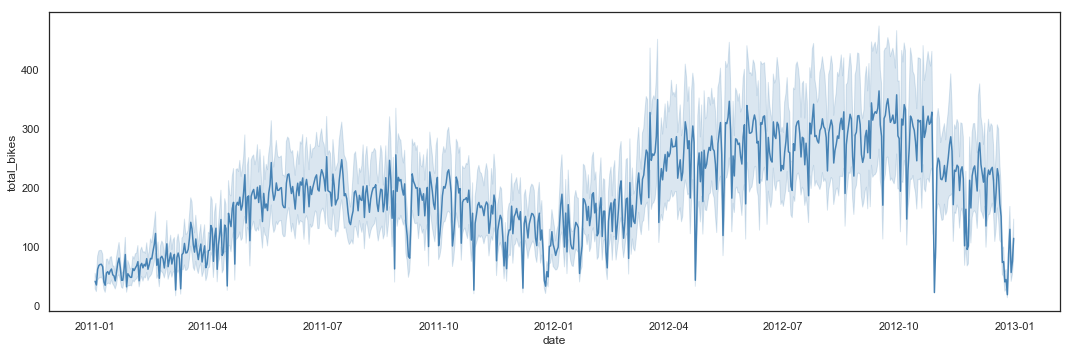

In [18]:
# Total_bikes evolution per day
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.date,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

Based on the two years dataset, it seems that the utilization of the bike sharing service has increased over the period. The number of bikes rented per day also seems to vary depending on the season, with Spring and Summer months being showing a higher utilization of the service.

#### Bike sharing utilization by Month

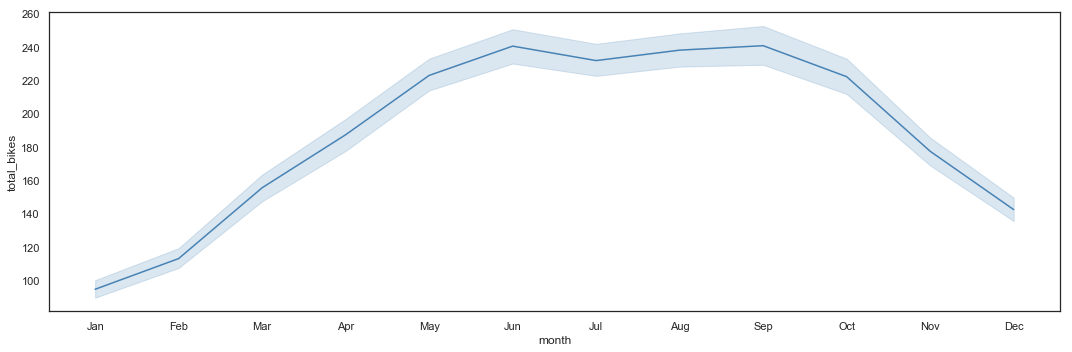

In [19]:
# Total_bikes by Month - Line Plot
plt.figure(figsize=(15,5))
g = sns.lineplot(x = hours_df.month,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.tight_layout()

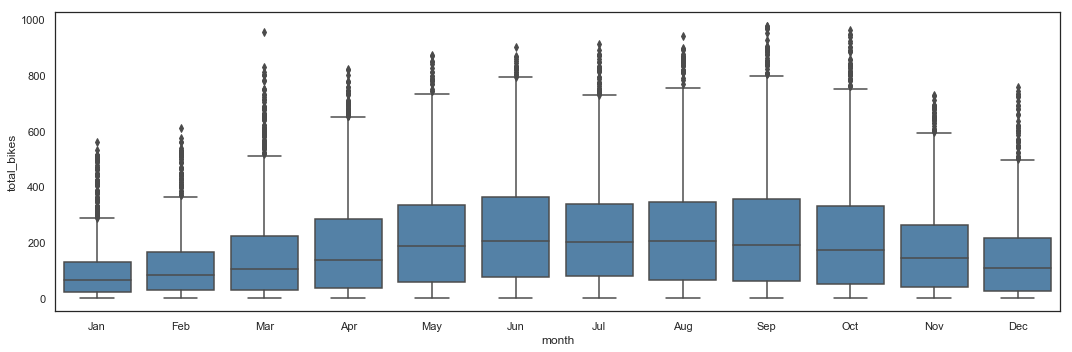

In [20]:
# Total_bikes by Month - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.month,
            y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

The average utilization per month seems to increase between April and October, with a higher variance too.

#### Bike sharing utilization by Hour

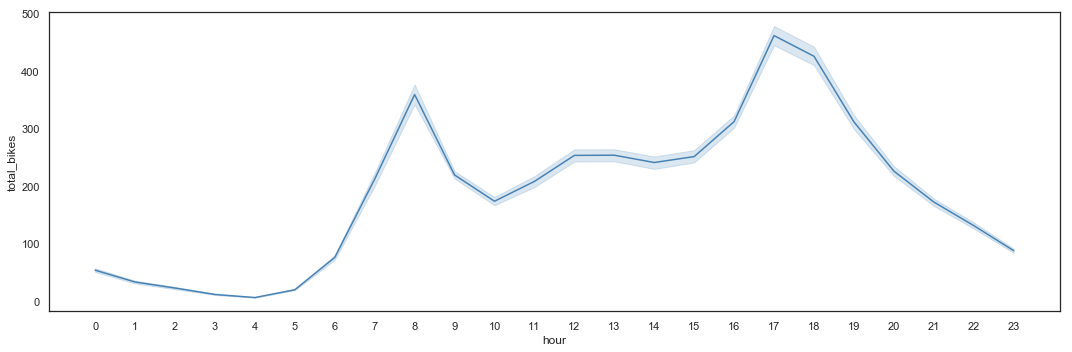

In [21]:
# Total_bikes by Hour - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.hour,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.tight_layout()

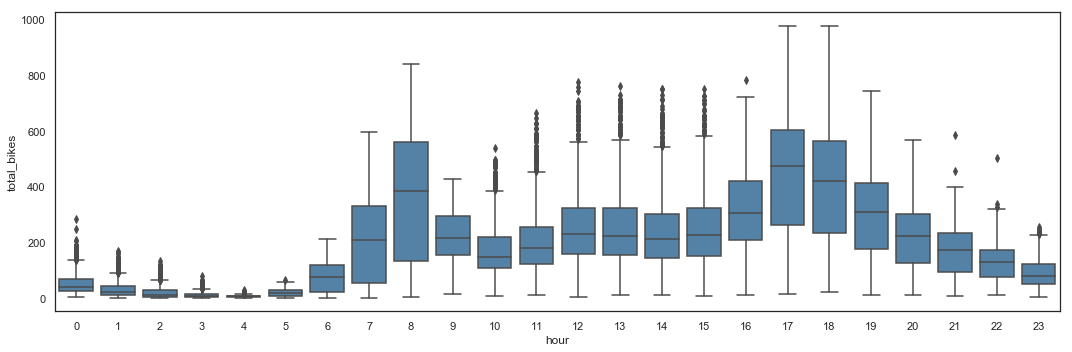

In [22]:
# Total_bikes by Hour - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.hour,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

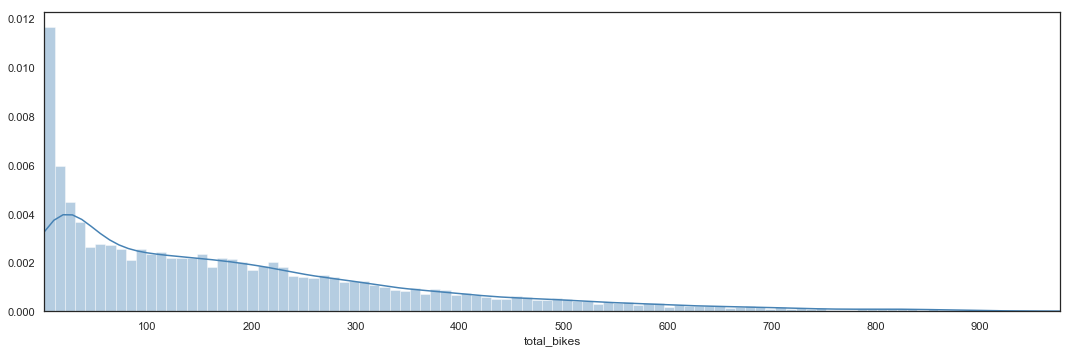

In [23]:
# Total_bikes by Hour - Distribution
plt.figure(figsize=(15,5))
sns.distplot(hours_df.total_bikes,
             bins = 100,
             color = 'steelblue').axes.set(xlim = (min(hours_df.total_bikes),max(hours_df.total_bikes)),
                                           xticks = [0,100,200,300,400,500,600,700,800,900,1000])
plt.tight_layout()

The utilization seems really similar over the day, with 2 peaks around 8am and between 5pm and 6pm. The box plot shows potential outliers in the data, which will be removed after the Feature Construction stage. It also highlight an important variance during day time, especially at peak times. The distribution plot shows that utilization is most of the time below 40 bikes simultaneously, and can reach about 1,000 bikes.

#### Bike sharing utilization by Season

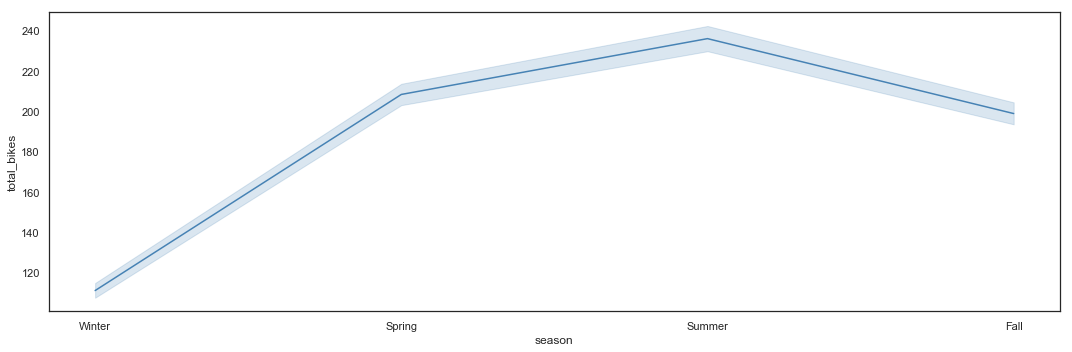

In [24]:
# Total_bikes by Season - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.season,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Winter', 'Spring', 'Summer', 'Fall'])
plt.xticks([1,2,3,4])
plt.tight_layout()

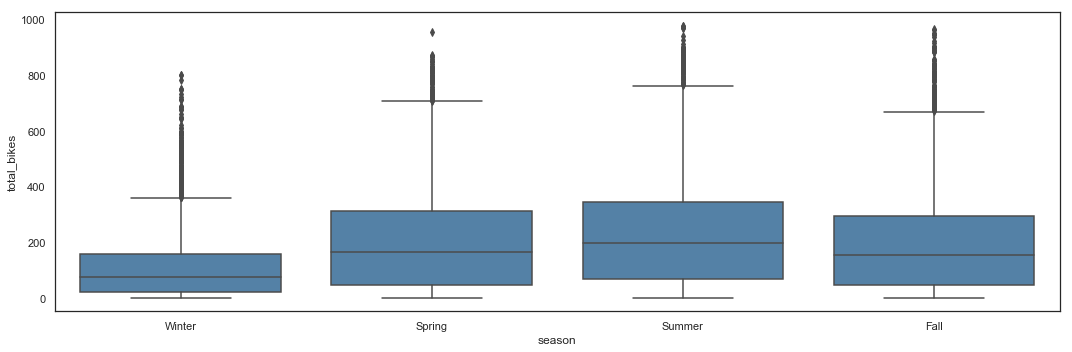

In [25]:
# Total_bikes by Season - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.season,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Winter', 'Spring', 'Summer', 'Fall'])
plt.tight_layout()

Summer appears to be the high season, with Spring and Fall having similar utilization shapes. Winter logically appears to be the low season with, however, potential utilization peaks which can reach the same number of bikes than in high season.

#### Bike sharing utilization by Holiday

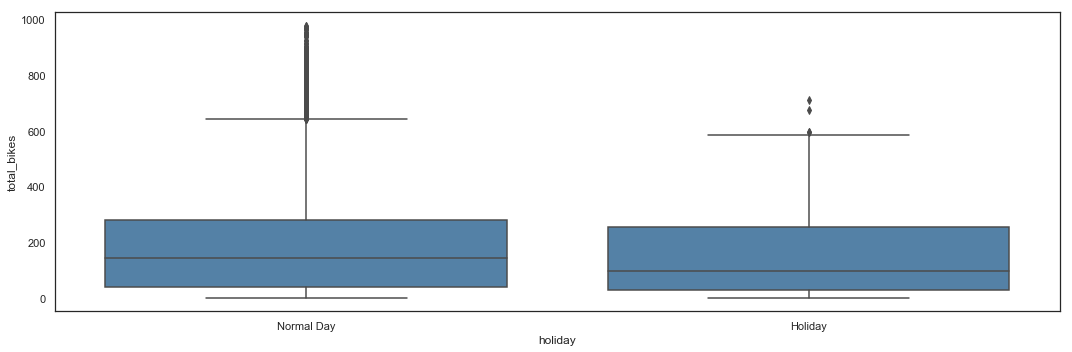

In [26]:
# Total_bikes by Holidays - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.holiday,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Normal Day', 'Holiday'])
plt.tight_layout()

Utilization of bikes during holidays seems lower and with less peaks.

#### Bike sharing utilization by Weekday

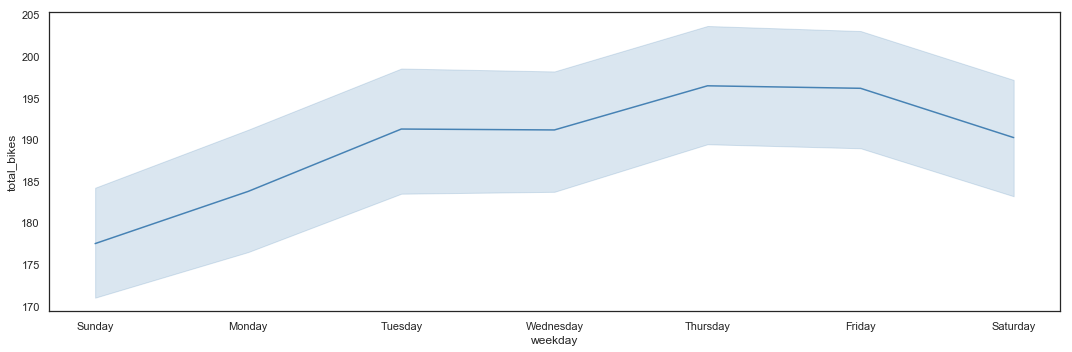

In [27]:
# Total_bikes by Weekday - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.weekday,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks([0,1,2,3,4,5,6])
plt.tight_layout()

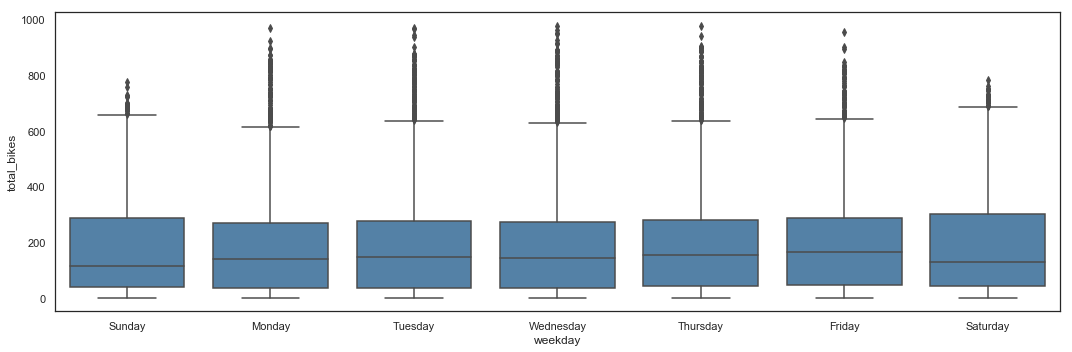

In [28]:
# Total_bikes by Weekday - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.weekday,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.tight_layout()

The average utilization per hour seems higher at the end of the week, but overall, weekends appear to have lower frequentation and weekdays have higher peaks.

#### Bike sharing utilization by Working Day

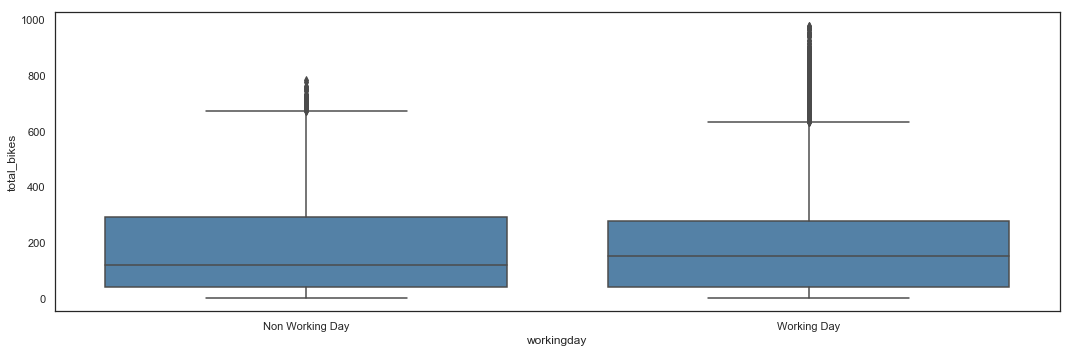

In [29]:
# Total_bikes by Working Day - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.workingday,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Non Working Day', 'Working Day'])
plt.tight_layout()

Utilization seems higher during working days, with higher peaks.

#### Bike sharing utilization by Weather Condition

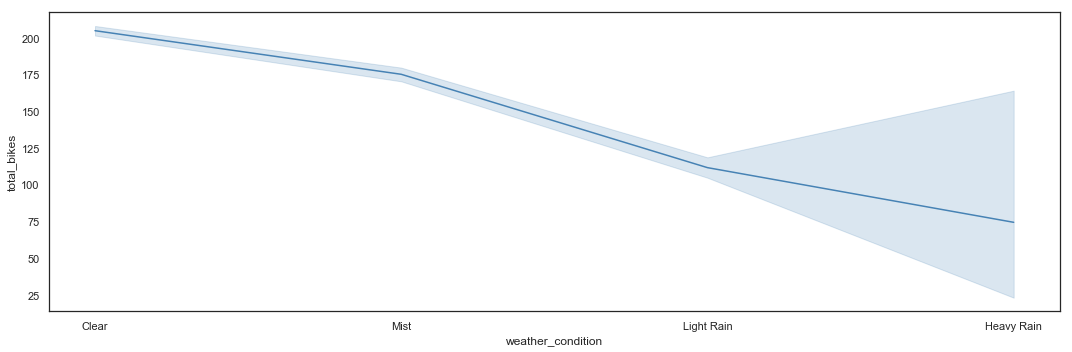

In [30]:
# Total_bikes by Weather Condition - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.weather_condition,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.xticks([1,2,3,4])
plt.tight_layout()

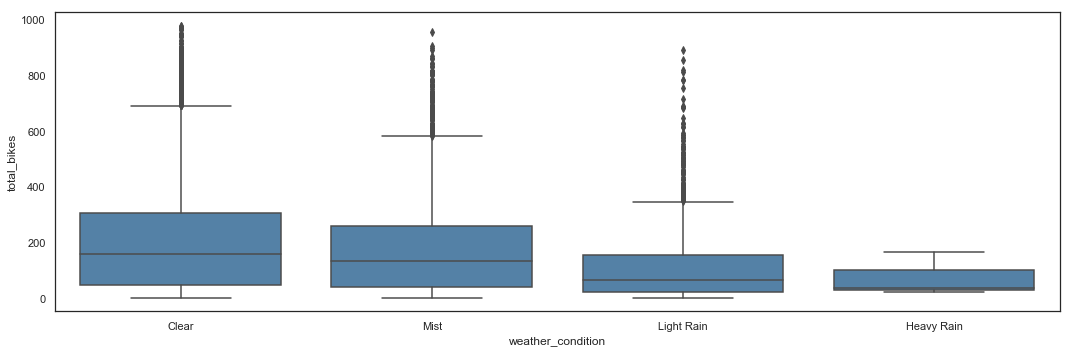

In [31]:
# Total_bikes by Weather Condition - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.weather_condition,
             y = hours_df.total_bikes,
             color = 'steelblue') \
   .axes.set_xticklabels(['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.tight_layout()

Unsurprisingly, bike sharing utilization is getting worse with bad weather.

#### Bike sharing utilization by Actual Temperature

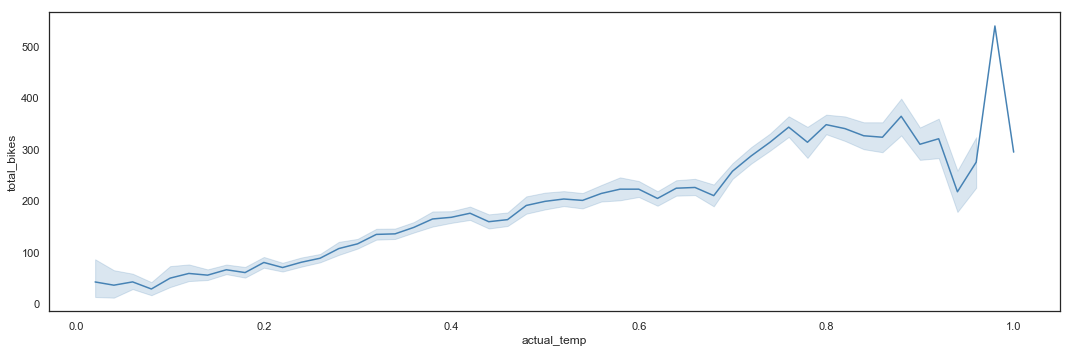

In [32]:
# Total_bikes by Actual Temperature - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.actual_temp,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

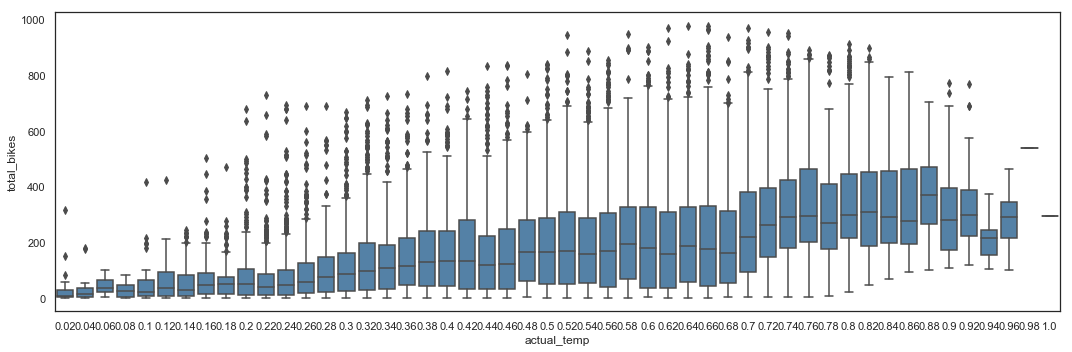

In [33]:
# Total_bikes by Actual Temperature - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.actual_temp,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

The utilization is almost inexistant for sub-zero temperatures. It then grows with the increase of temperature, but drops down when it gets extremely hot.

#### Bike sharing utilization by Feeling Temperature

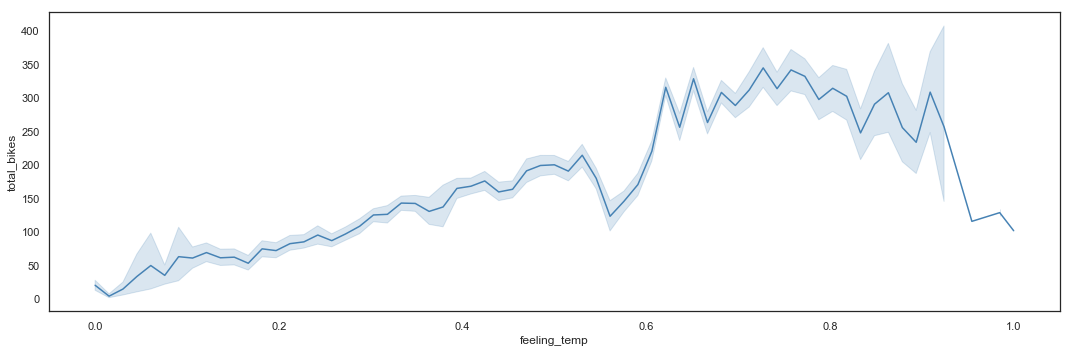

In [34]:
# Total_bikes by Feeling Temperature - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.feeling_temp,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

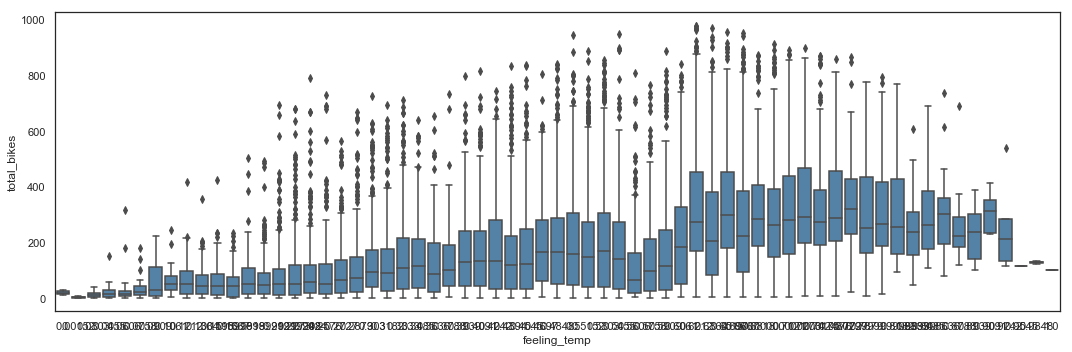

In [35]:
# Total_bikes by Feeling Temperature - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.feeling_temp,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

The utilization by feeling temperature follows the same rules than by actual temperature.

#### Bike sharing utilization by Humidity

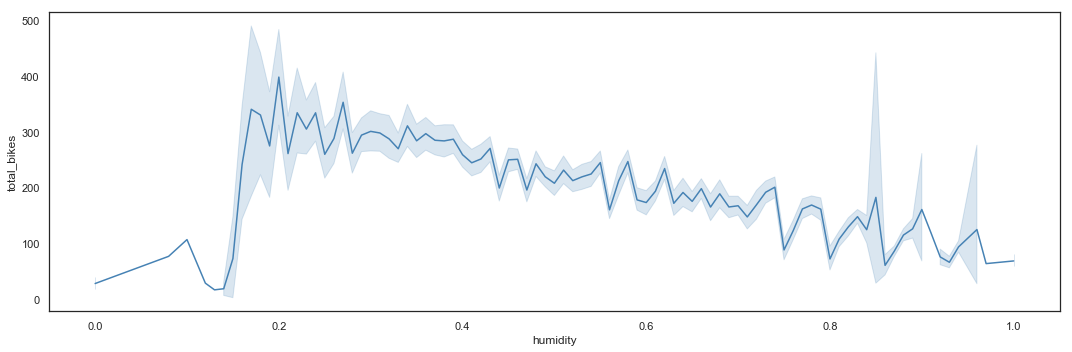

In [36]:
# Total_bikes by Humidity - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.humidity,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

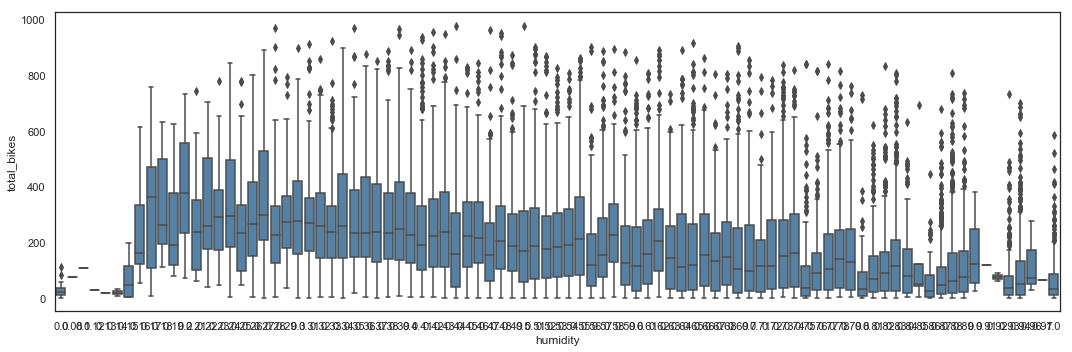

In [37]:
# Total_bikes by Humidity - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.humidity,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

The utilization of bike sharing services is decreasing with the increase of humidity.

#### Bike sharing utilization by Wind Speed

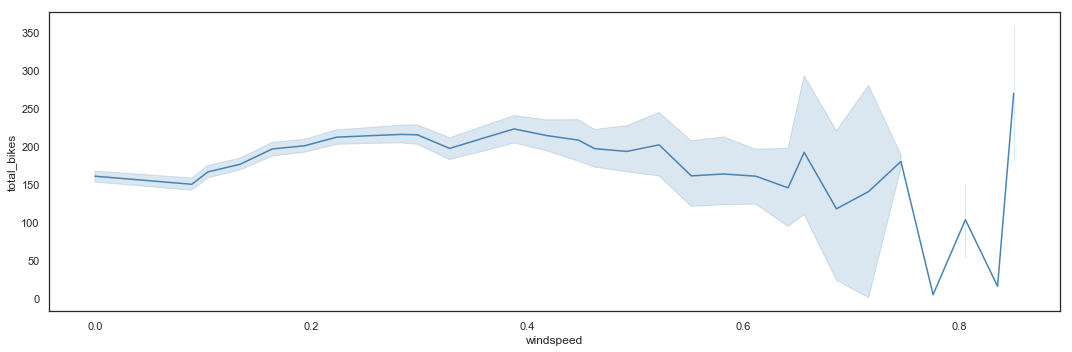

In [38]:
# Total_bikes by Wind Speed - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = hours_df.windspeed,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

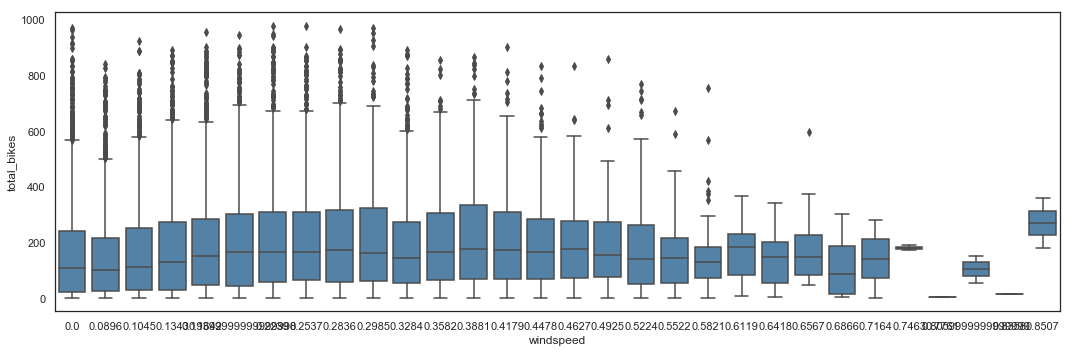

In [39]:
# Total_bikes by Wind Speed - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.windspeed,
             y = hours_df.total_bikes,
             color = 'steelblue')
plt.tight_layout()

Stronger wind seems to discourage users to use the bike sharing service.

#### Bike sharing utilization by Casual

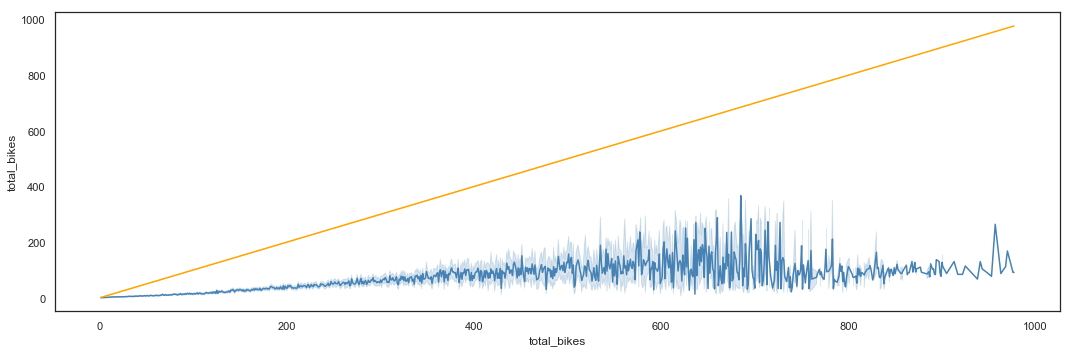

In [40]:
# Total_bikes by Casual - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(y = hours_df.casual,
             x = hours_df.total_bikes,
             color = 'steelblue')
sns.lineplot(y = hours_df.total_bikes,
             x = hours_df.total_bikes,
             color = 'orange')
plt.tight_layout()

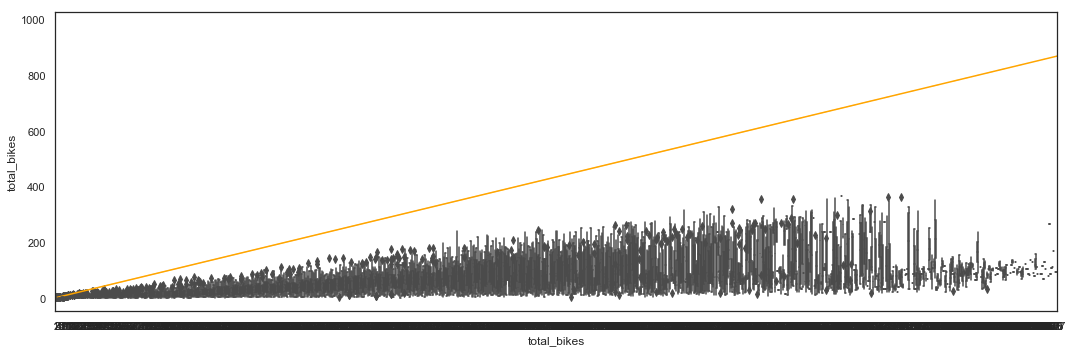

In [41]:
# Total_bikes by Casual - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(y = hours_df.casual,
            x = hours_df.total_bikes,
             color = 'steelblue')
sns.lineplot(y = hours_df.total_bikes,
             x = hours_df.total_bikes,
             color = 'orange')
plt.tight_layout()

The number of casual users seems to be quite low compared to the total users, but there are peaks of activity when total utilization reaches values between 500 and 800 bikes.

#### Bike sharing utilization by Registered

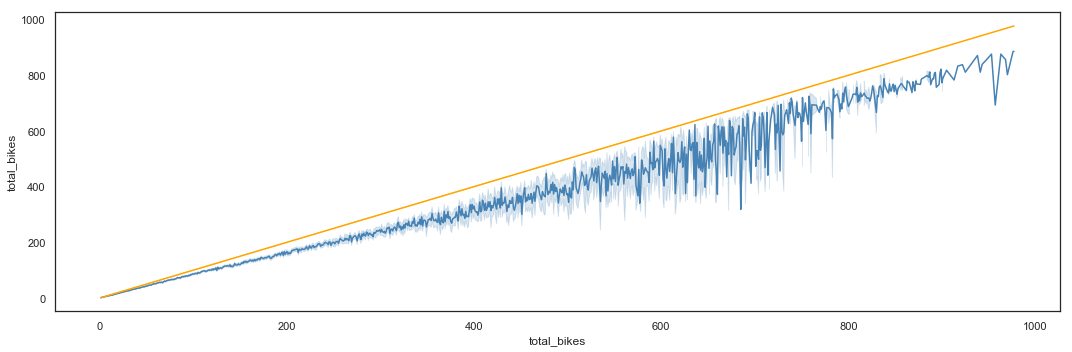

In [42]:
# Total_bikes by Registered - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(y = hours_df.registered,
             x = hours_df.total_bikes,
             color = 'steelblue')
sns.lineplot(y = hours_df.total_bikes,
             x = hours_df.total_bikes,
             color = 'orange')
plt.tight_layout()

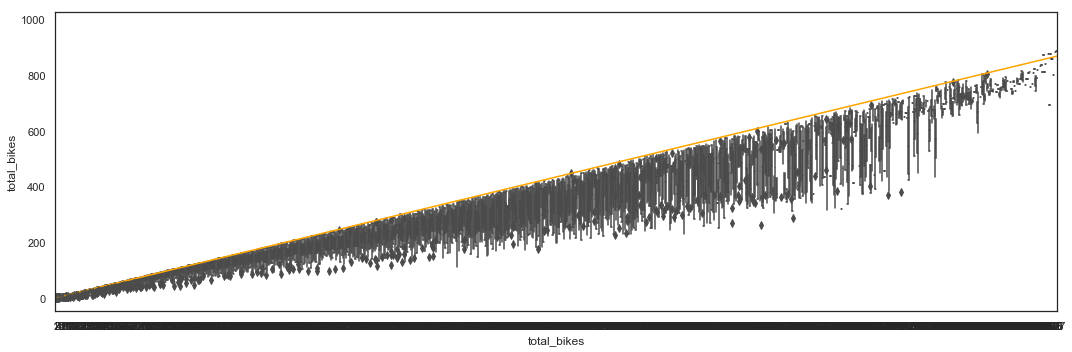

In [43]:
# Total_bikes by Registered - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(y = hours_df.registered,
            x = hours_df.total_bikes,
             color = 'steelblue')
sns.lineplot(y = hours_df.total_bikes,
             x = hours_df.total_bikes,
             color = 'orange')
plt.tight_layout()

The number of registered users is usually high, compared to the total number of bikes. There are however drops between 500 and 800 total users.

#### Casual vs Registered Users

In [44]:
cas_reg = pd.DataFrame(hours_df.registered)
cas_reg['casual'] = hours_df.casual
cas_reg['total_bikes'] = hours_df.total_bikes
cas_reg['ratio_cas_tot'] = np.where(cas_reg.total_bikes == 0,0,round(cas_reg.casual / cas_reg.total_bikes,4))

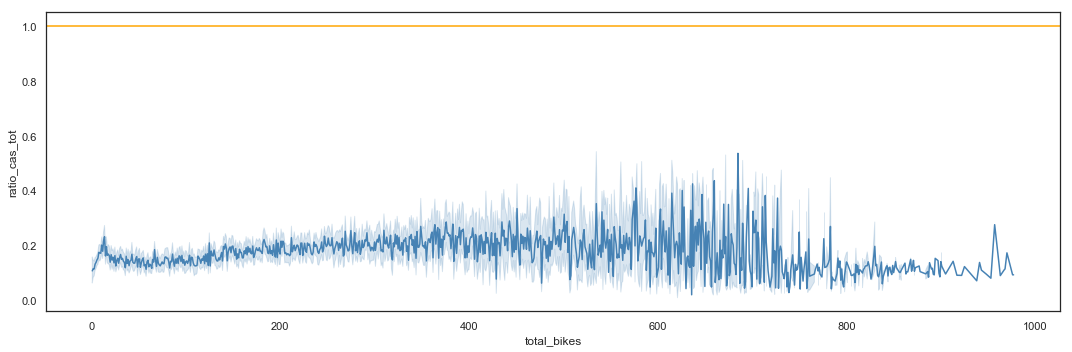

In [45]:
# Ratio of Casual Users - Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(y = cas_reg.ratio_cas_tot,
             x = cas_reg.total_bikes,
             color = 'steelblue')
plt.axhline(1, color='orange')
plt.tight_layout()

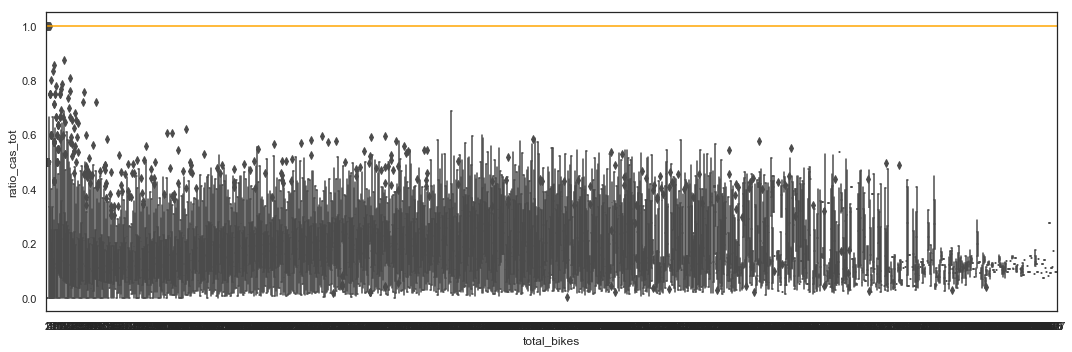

In [46]:
# Ratio of Casual Users - Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(y = cas_reg.ratio_cas_tot,
            x = cas_reg.total_bikes,
             color = 'steelblue')
plt.axhline(1, color='orange')
plt.tight_layout()

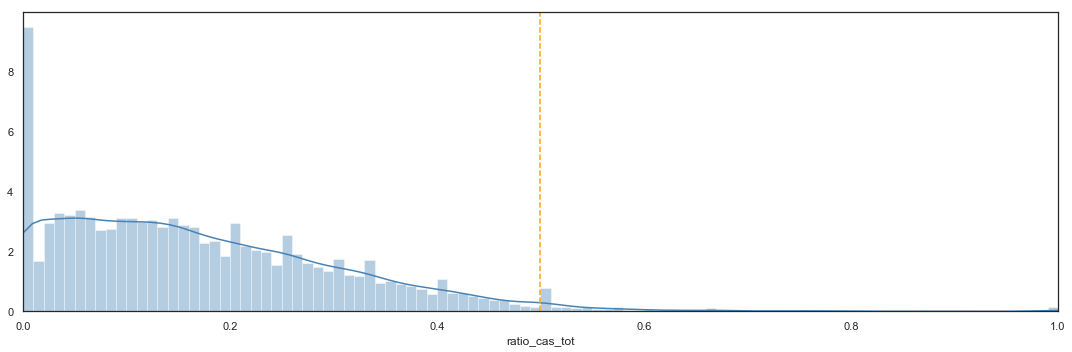

In [47]:
# Ratio of Casual Users - Distribution
plt.figure(figsize=(15,5))
sns.distplot(cas_reg.ratio_cas_tot,
             bins = 100,
             color = 'steelblue').axes.set(xlim = (min(cas_reg.ratio_cas_tot),max(cas_reg.ratio_cas_tot)))
plt.axvline(0.5, color='orange', linestyle='--')
plt.tight_layout()

The ratio of casual users is most of the time lower than the ratio of registered users, mainly lower than 30% of total users.

#### Total_Bikes by Hour with Holiday Hue

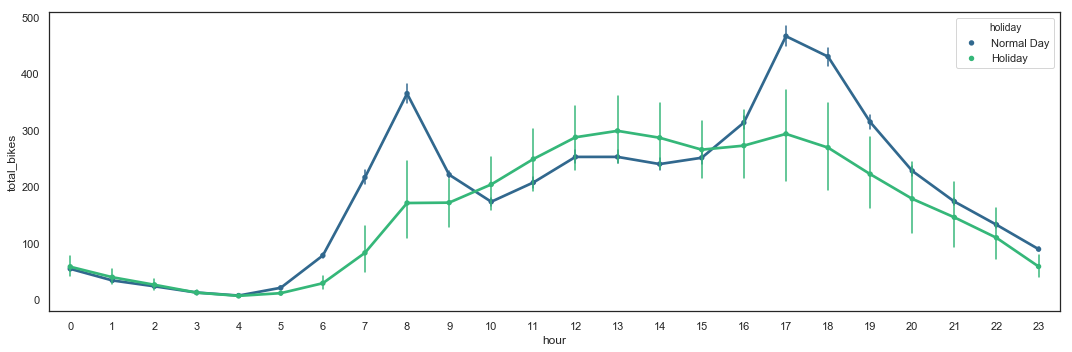

In [48]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.total_bikes,
             x = hours_df.hour,
             hue = hours_df.holiday.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Normal Day', 'Holiday']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()

The utilization by hour during normal days differs from the utilization during holidays. During normal days, two (2) peaks are present during commute times (around 8am and 5-6pm), while during holidays, utilization is higher during the day between 10am and 8pm. Utilization during holidays also shows a higher variance.

#### Total_Bikes by Hour with Working Day Hue

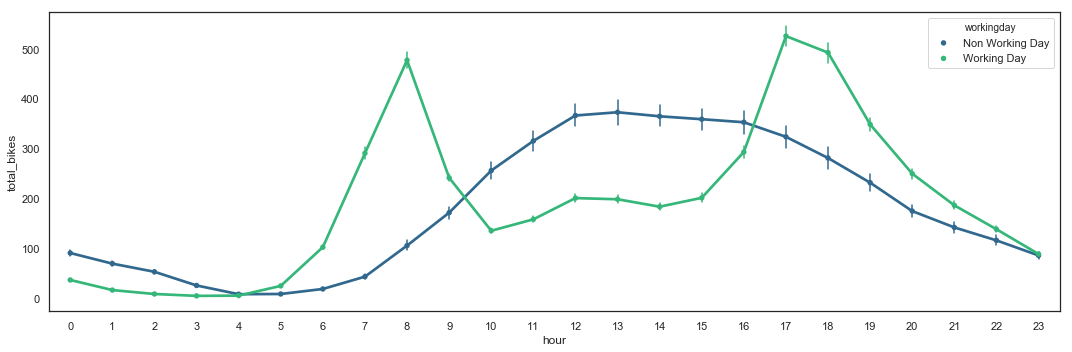

In [49]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.total_bikes,
             x = hours_df.hour,
             hue = hours_df.workingday.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Non Working Day', 'Working Day']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
# plt.axhline(hours_df.total_bikes.mean()+0.315*hours_df.total_bikes.mean(), color='orange')
plt.tight_layout()

Quite similar than the utilization by holiday, the utilization by hour during working days differs from the utilization during non working days. During working days, two (2) peaks are present during commute times (around 8am and 5-6pm), while during non working days, utilization is higher during the day between 10am and 8pm. Interestingly, utilization during non working day seems to have less variance than during holidays.

#### Total_Bikes by Hour with Weekday Hue

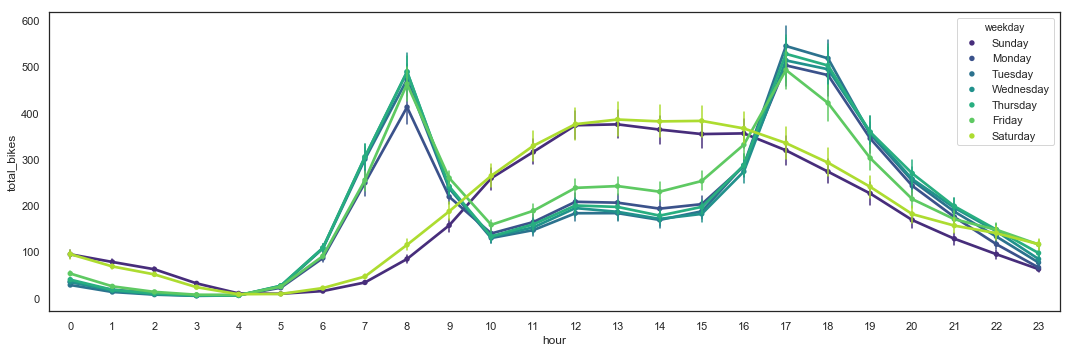

In [50]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.total_bikes,
             x = hours_df.hour,
             hue = hours_df.weekday.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# plt.axhline(hours_df.total_bikes.mean(), color='steelblue')
# plt.axhline(hours_df.total_bikes.mean()+0.315*hours_df.total_bikes.mean(), color='orange')
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()

The utilization by hour during weekdays differs from the utilization during weekends. During weekdays, two (2) peaks are present during commute times (around 8am and 5-6pm), while during weekends, utilization is higher during the day between 10am and 6pm.

#### Total_Bikes by Hour with Weekday Hue for Registered Users

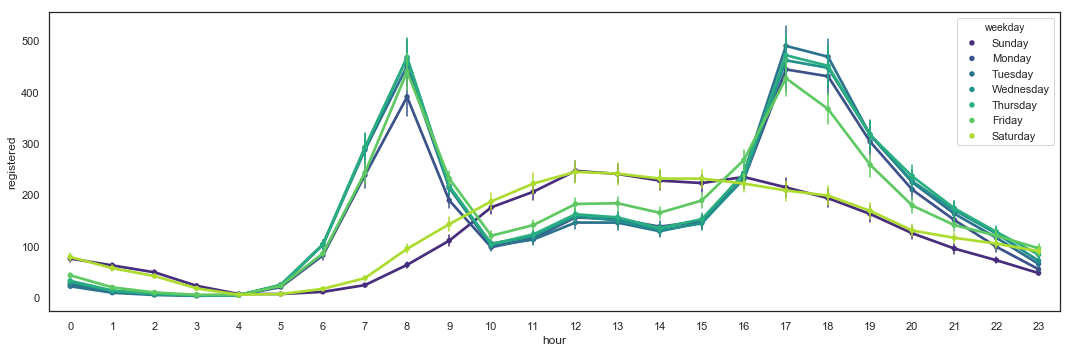

In [51]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.registered,
             x = hours_df.hour,
             hue = hours_df.weekday.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()

Registered users seem to be responsible for the two (2) peaks during commute times. They still use the bikes during the weekends.

#### Total_Bikes by Hour with Weekday Hue for Casual Users

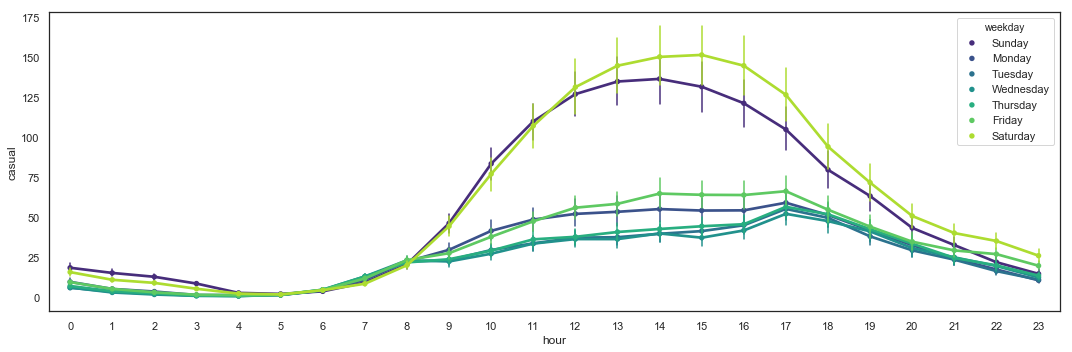

In [52]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.casual,
             x = hours_df.hour,
             hue = hours_df.weekday.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()

Casual users are mainly using the bikes during the weekends.

#### Total_Bikes by Hour with Weather Conditions Hue

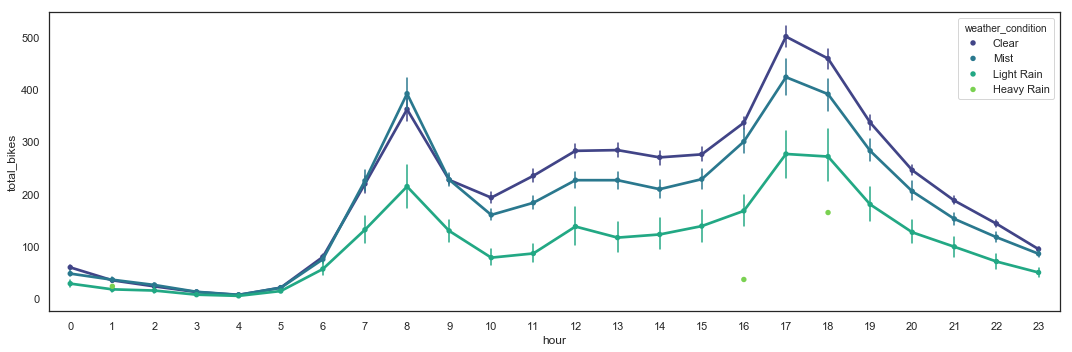

In [53]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.total_bikes,
             x = hours_df.hour,
             hue = hours_df.weather_condition.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()

The weather seems to have a consistent impact on the utilization by hour, except for mist which doesn't seem to discourage morning commuters.

#### Total_Bikes by Hour with Seasons Hue

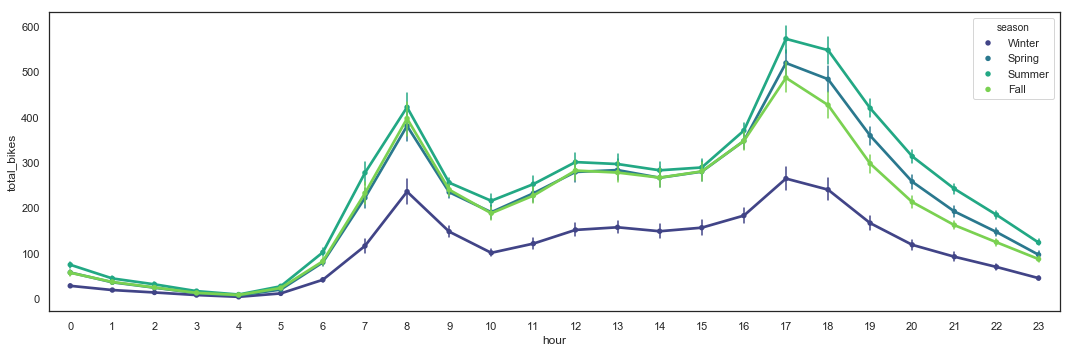

In [54]:
plt.figure(figsize=(15,5))
g = sns.pointplot(y = hours_df.total_bikes,
             x = hours_df.hour,
             hue = hours_df.season.astype('int'),
             palette = 'viridis',
             markers='.',
             errwidth = 1.5)
g_legend = g.axes.get_legend()
g_labels = ['Winter', 'Spring', 'Summer', 'Fall']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)
plt.tight_layout()

The season seems to have a consistent impact on the utilization by hour, with Winter discouraging a big part of the users.

#### Humidity by Actual Temperature

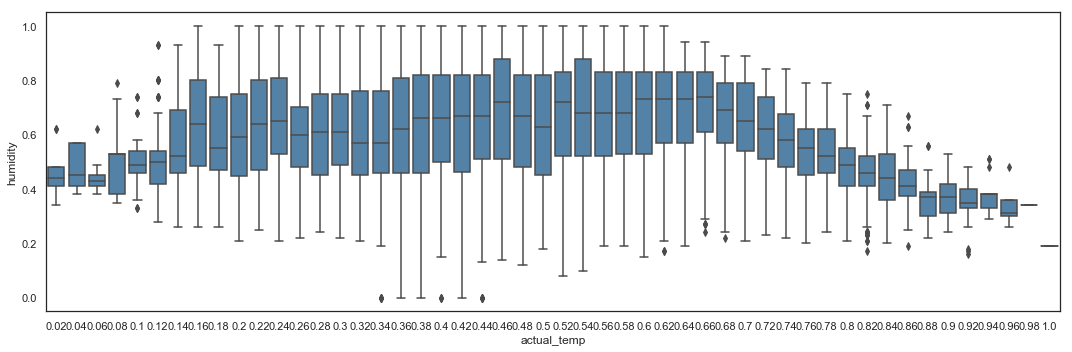

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(x = hours_df.actual_temp,
            y = hours_df.humidity,
             color = 'steelblue')
plt.tight_layout()

The humidity seems to be changing regardless of the actual temperature, except for extreme temperature values where humidity seems to stabilize.

#### Correlation Analysis

A correlation analysis will allow to identify relationships between the dataset variables. A plot of their distributions highlighting the value of the target variable might also reveal some patterns.

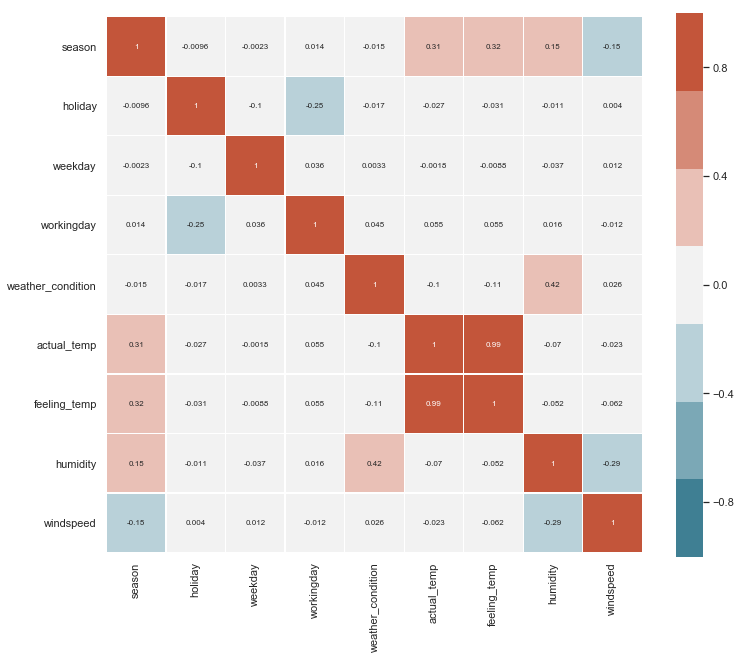

In [56]:
hours_df_corr = hours_df.copy()
hours_df_corr = hours_df_corr.drop(['date', 'year', 'month', 'hour', 'casual', 'registered', 'total_bikes'], axis=1)
for column in hours_df_corr.columns:
    hours_df_corr[column] = hours_df_corr[column].astype('float')
    
plt.figure(figsize=(12, 10))
sns.heatmap(hours_df_corr.corr(), 
            cmap=sns.diverging_palette(220, 20, n=7), vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

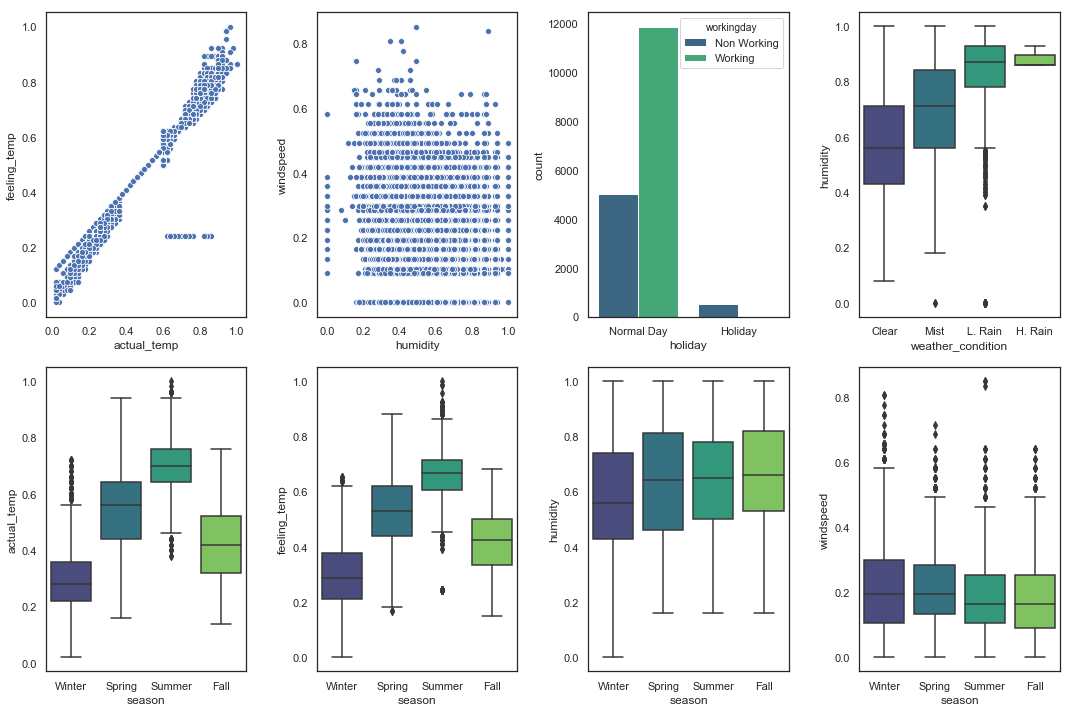

In [57]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(2,4)

sns.scatterplot(hours_df['actual_temp'], hours_df['feeling_temp'], palette=('viridis'), ax = axs[0,0])

sns.scatterplot(hours_df['humidity'],hours_df['windspeed'], palette=('viridis'), ax = axs[0,1])

sns.countplot(hours_df['holiday'],hue=hours_df['workingday'], palette=('viridis'), ax = axs[0,2])
axs[0,2].set_xticklabels(labels=['Normal Day', 'Holiday'])
g_legend = axs[0,2].get_legend()
g_labels = ['Non Working', 'Working']
for t, l in zip(g_legend.texts, g_labels): t.set_text(l)

sns.boxplot(hours_df['weather_condition'], hours_df['humidity'], palette=('viridis'), ax = axs[0,3])
axs[0,3].set_xticklabels(labels=['Clear', 'Mist', 'L. Rain', 'H. Rain'])

sns.boxplot(hours_df['season'], hours_df['actual_temp'], palette=('viridis'), ax = axs[1,0])
axs[1,0].set_xticklabels(labels=['Winter', 'Spring', 'Summer', 'Fall'])

sns.boxplot(hours_df['season'], hours_df['feeling_temp'], palette=('viridis'), ax = axs[1,1])
axs[1,1].set_xticklabels(labels=['Winter', 'Spring', 'Summer', 'Fall'])

sns.boxplot(hours_df['season'], hours_df['humidity'], palette=('viridis'), ax = axs[1,2])
axs[1,2].set_xticklabels(labels=['Winter', 'Spring', 'Summer', 'Fall'])

sns.boxplot(hours_df['season'], hours_df['windspeed'], palette=('viridis'), ax = axs[1,3])
axs[1,3].set_xticklabels(labels=['Winter', 'Spring', 'Summer', 'Fall'])

fig.tight_layout()

The correlation matrix shows a high correlation between `actual_temp` and `feeling_temp`. Thus, only the `actual_temp` variable will be used in the study, and the `feeling_temp` will be removed from the dataset.

Another interesting relationship exists between `holiday` and `workingday`. Every holiday is a non-working day. Based on previous plots, the utilization of bikes per hour based on `workingday` seems to be more stable than based on `holiday`, thus the variable `holiday` will be removed.

Some other logical correlations can be found between meteorological conditions and seasons, but they are not strong enough to lighten the dataset.

### Scaling and Skewness

In [58]:
hours_prep_scaled = hours_df.copy().drop(['date','casual', 'registered', 'holiday','feeling_temp'],axis=1)

In [59]:
hours_prep_scaled.describe()

,actual_temp,humidity,windspeed,total_bikes
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,0.190098,189.463088
std,0.192556,0.192930,0.122340,181.387599
min,0.020000,0.000000,0.000000,1.000000
25%,0.340000,0.480000,0.104500,40.000000
50%,0.500000,0.630000,0.194000,142.000000
75%,0.660000,0.780000,0.253700,281.000000
max,1.000000,1.000000,0.850700,977.000000


In [60]:
scaler = MinMaxScaler()
hours_prep_scaled[['actual_temp', 'humidity', 'windspeed', 'total_bikes']] = pd.DataFrame(scaler.fit_transform(hours_prep_scaled[['actual_temp', 'humidity','windspeed', 'total_bikes']]))
hours_prep_scaled.describe()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,actual_temp,humidity,windspeed,total_bikes
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.486722,0.627229,0.223460,0.193097
std,0.196486,0.192930,0.143811,0.185848
min,0.000000,0.000000,0.000000,0.000000
25%,0.326531,0.480000,0.122840,0.039959
50%,0.489796,0.630000,0.228047,0.144467
75%,0.653061,0.780000,0.298225,0.286885
max,1.000000,1.000000,1.000000,1.000000


In [61]:
def feature_skewness(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features

def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[feature_skew > 0.5]
    skew_index = high_skew.index
    
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

    skew_features = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return df

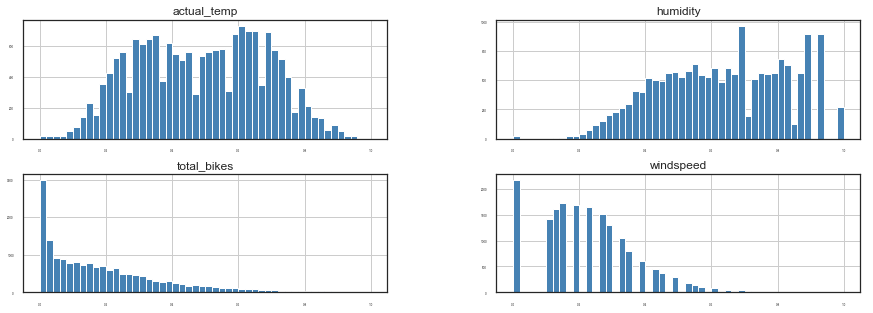

In [62]:
hours_df_num = hours_df.select_dtypes(include = ['float64', 'int64']);
hours_prep_scaled.hist(figsize=(15, 5), bins=50, xlabelsize=3, ylabelsize=3, color='steelblue');

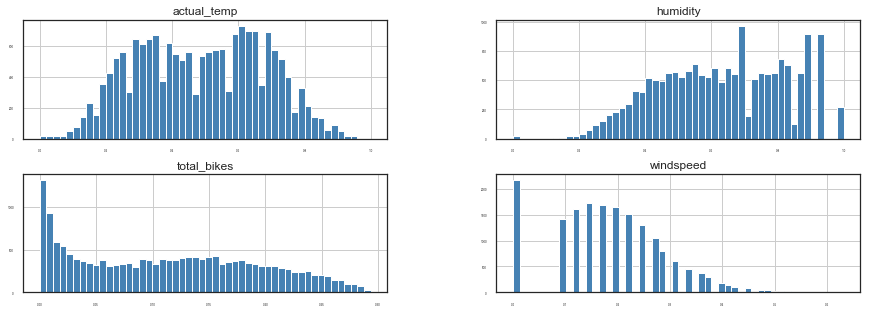

In [63]:
hours_prep_skew = fix_skewness(hours_prep_scaled)
hours_prep_skew.hist(figsize=(15, 5), bins=50, xlabelsize=3, ylabelsize=3, color='steelblue');

The scale and skewness of the dataset are corrected.

### Encoding Categorical Variables

In [64]:
hours_prep_encoded = hours_prep_skew.copy()

In [65]:
def date_features(df):
    columns = df.columns
    return df.select_dtypes(include=[np.datetime64]).columns

def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    date_columns = date_features(df)
    return(list(set(df.columns) - set(numerical_columns) - set(date_columns) ))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

def onehot_encode_single(df, col_to_encode, drop = True):
    if type(col_to_encode) != str:
        raise TypeError ('col_to_encode should be a string.')
    new_df = df.copy()
    
    if drop == True:
        new_df = new_df.drop([col_to_encode], axis=1)

    new_df = pd.concat([new_df, 
                        pd.get_dummies(df[col_to_encode],
                                       prefix=col_to_encode)],
                       axis=1)
    return new_df

In [66]:
hours_clean = onehot_encode(hours_prep_encoded)
df_desc(hours_clean)

,dtype,NAs,Numerical,Boolean,Categorical,Date
actual_temp,float64,0,True,False,False,False
humidity,float64,0,True,False,False,False
windspeed,float64,0,True,False,False,False
total_bikes,float64,0,True,False,False,False
season_1,uint8,0,False,True,False,False
season_2,uint8,0,False,True,False,False
season_3,uint8,0,False,True,False,False
season_4,uint8,0,False,True,False,False
workingday_0,uint8,0,False,True,False,False
workingday_1,uint8,0,False,True,False,False


In [67]:
# Rename columns
hours_clean.rename(columns={'year_0':'year_2011',
                        'year_1':'year_2012',
                        'season_1':'season_winter',
                        'season_2':'season_spring',
                        'season_3':'season_summer',
                        'season_4':'season_fall',
                        'workingday_0':'workingday_no',
                        'workingday_1':'workingday_yes',
                        'month_1':'month_jan',
                        'month_2':'month_feb',
                        'month_3':'month_mar',
                        'month_4':'month_apr',
                        'month_5':'month_may',
                        'month_6':'month_jun',
                        'month_7':'month_jul',
                        'month_8':'month_aug',
                        'month_9':'month_sep',
                        'month_10':'month_oct',
                        'month_11':'month_nov',
                        'month_12':'month_dec',
                        'weather_condition_1':'weather_condition_clear',
                        'weather_condition_2':'weather_condition_mist',
                        'weather_condition_3':'weather_condition_light_rain',
                        'weather_condition_4':'weather_condition_heavy_rain',
                        'weekday_0':'weekday_sunday',
                        'weekday_1':'weekday_monday',
                        'weekday_2':'weekday_tuesday',
                        'weekday_3':'weekday_wednesday',
                        'weekday_4':'weekday_thursday',
                        'weekday_5':'weekday_friday',
                        'weekday_6':'weekday_saturday'},
                inplace=True)

In [68]:
hours_clean.drop('workingday_no', inplace = True, axis = 1)

The variable `workingday_no` has been removed, as complementary of `workingday_yes`.

In [69]:
hours_clean.head()

,actual_temp,humidity,windspeed,total_bikes,season_winter,season_spring,season_summer,season_fall,workingday_yes,weather_condition_clear,weather_condition_mist,weather_condition_light_rain,weather_condition_heavy_rain,weekday_sunday,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,month_jan,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,year_2011,year_2012,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.224490,0.81,0.0,0.014911,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.204082,0.80,0.0,0.036985,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.204082,0.80,0.0,0.029859,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.224490,0.75,0.0,0.012001,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.224490,0.75,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The dataset is ready for modeling.

### Training/Test Split

In [70]:
def list_features(df, target):
    features = list(df)
    features.remove(target)
    return features

In [71]:
target = 'total_bikes'
features = list_features(hours_clean, target)

In [72]:
X = hours_clean[features]
X_train = X.loc[(X['year_2011']==1) | ((X['year_2012']==1) & (X['month_sep']==0) & (X['month_oct']==0) & (X['month_nov']==0) & (X['month_dec']==0)),features]
X_test = X.loc[(X['year_2012']==1) & ((X['month_sep']==1) | (X['month_oct']==1) | (X['month_nov']==1) | (X['month_dec']==1)),features]
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('X_train:', X_train.shape[0],'rows |', X_train.shape[1], 'columns'))
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('X_test:', X_test.shape[0],'rows |', X_test.shape[1], 'columns'))

X_train:   14491 rows |  57 columns
X_test:     2888 rows |  57 columns


In [73]:
X_train.groupby(['year_2011','year_2012','month_jan','month_feb','month_mar','month_apr','month_may','month_jun','month_jul','month_aug','month_sep','month_oct','month_nov','month_dec']).size().reset_index()

,year_2011,year_2012,month_jan,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,0
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,744
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,744
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,720
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,744
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,718
5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,743
6,0,1,0,1,0,0,0,0,0,0,0,0,0,0,692
7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,741
8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,741
9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,719


In [74]:
X_test.groupby(['year_2011','year_2012','month_jan','month_feb','month_mar','month_apr','month_may','month_jun','month_jul','month_aug','month_sep','month_oct','month_nov','month_dec']).size().reset_index()

,year_2011,year_2012,month_jan,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,0
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,742
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,718
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,708
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,720


In [75]:
y = hours_clean.copy()
y_train = y.loc[(y['year_2011']==1) | ((y['year_2012']==1) & (y['month_sep']==0) & (y['month_oct']==0) & (y['month_nov']==0) & (y['month_dec']==0)),:]
y_test = y.loc[(y['year_2012']==1) & ((y['month_sep']==1) | (y['month_oct']==1) | (y['month_nov']==1) | (y['month_dec']==1)),:]
y_train = pd.DataFrame(y_train[target])
y_test = pd.DataFrame(y_test[target])
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('y_train:', y_train.shape[0],'rows |', y_train.shape[1], 'columns'))
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('y_test:', y_test.shape[0],'rows |', y_test.shape[1], 'columns'))

y_train:   14491 rows |   1 columns
y_test:     2888 rows |   1 columns


In [76]:
print('{:<35} {!r:>}'.format('Same indexes for X_train and y_train:', X_train.index.values.tolist() == y_train.index.values.tolist()))
print('{:<35} {!r:>}'.format('Same indexes for X_test and y_test:', X_test.index.values.tolist() == y_test.index.values.tolist()))

Same indexes for X_train and y_train: True
Same indexes for X_test and y_test: True


In [77]:
print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Features:',X.shape[0], 'items | ', X.shape[1],'columns'))
print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Features Train:',X_train.shape[0], 'items | ', X_train.shape[1],'columns'))
print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Features Test:',X_test.shape[0], 'items | ',  X_test.shape[1],'columns'))
print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Target:',y.shape[0], 'items | ', 1,'columns'))
print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Target Train:',y_train.shape[0], 'items | ', 1,'columns'))
print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Target Test:',y_test.shape[0], 'items | ', 1,'columns'))

Features:        17379 items |  57 columns
Features Train:  14491 items |  57 columns
Features Test:    2888 items |  57 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns


The Train Set is arbitrarily defined as all records until August 31st 2012, and the Test Set all records from September 1st 2012. Below function will be used to repeat the operation on future dataframes including new features.

In [78]:
def train_test_split_0(df, target, features):
    X = df[features]
    y = pd.DataFrame(df[target])
    X_train = X.loc[(X['year_2011']==1) | ((X['year_2012']==1) & (X['month_sep']==0) & (X['month_oct']==0) & (X['month_nov']==0) & (X['month_dec']==0)),features]
    X_test = X.loc[(X['year_2012']==1) & ((X['month_sep']==1) | (X['month_oct']==1) | (X['month_nov']==1) | (X['month_dec']==1)),features]
    y_train = y.iloc[X_train.index.values.tolist()]
    y_test = y.iloc[X_test.index.values.tolist()]
    
    print('{:<40} {!r:>}'.format('Same indexes for X and y:', X.index.values.tolist() == y.index.values.tolist()))
    print('{:<40} {!r:>}'.format('Same indexes for X_train and y_train:', X_train.index.values.tolist() == y_train.index.values.tolist()))
    print('{:<40} {!r:>}'.format('Same indexes for X_test and y_test:', X_test.index.values.tolist() == y_test.index.values.tolist()))
    print()
    print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Features:',X.shape[0], 'items | ', X.shape[1],'columns'))
    print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Features Train:',X_train.shape[0], 'items | ', X_train.shape[1],'columns'))
    print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Features Test:',X_test.shape[0], 'items | ',  X_test.shape[1],'columns'))
    print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Target:',y.shape[0], 'items | ', 1,'columns'))
    print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Target Train:',y_train.shape[0], 'items | ', 1,'columns'))
    print('{:<15} {:>6} {:>6} {:>2} {:>6}'.format('Target Test:',y_test.shape[0], 'items | ', 1,'columns'))
    print()
    
    return X, X_train, X_test, y, y_train, y_test

## Baseline

In [79]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('Intercept:', lm.intercept_)
print('Coefficients:', lm.coef_)
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Variance score (R2): {:.2f}'.format(r2_score(y_test, y_pred)))

Intercept: [1.50217754e+11]
Coefficients: [[ 9.70668291e-02 -2.98877560e-02 -1.78445554e-02 -4.38452305e+11
  -4.38452305e+11 -4.38452305e+11 -4.38452305e+11  9.68669957e-03
   9.02709213e+10  9.02709213e+10  9.02709213e+10  9.02709213e+10
   3.15025214e+11  3.15025214e+11  3.15025214e+11  3.15025214e+11
   3.15025214e+11  3.15025214e+11  3.15025214e+11  2.22788908e+11
   2.22788908e+11  2.22788908e+11  2.22788908e+11  2.22788908e+11
   2.22788908e+11  2.22788908e+11  2.22788908e+11  2.22788908e+11
   2.22788908e+11  2.22788908e+11  2.22788908e+11 -3.23998342e+11
  -3.23998342e+11 -1.58521497e+10 -1.58521497e+10 -1.58521497e+10
  -1.58521497e+10 -1.58521497e+10 -1.58521497e+10 -1.58521497e+10
  -1.58521497e+10 -1.58521497e+10 -1.58521497e+10 -1.58521497e+10
  -1.58521497e+10 -1.58521497e+10 -1.58521497e+10 -1.58521497e+10
  -1.58521497e+10 -1.58521497e+10 -1.58521497e+10 -1.58521497e+10
  -1.58521497e+10 -1.58521497e+10 -1.58521497e+10 -1.58521497e+10
  -1.58521497e+10]]
Mean squared e

The baseline model for our dataset obtains a R square of 0.76 with 57 features.

## Feature Engineering

### Cross Validation Strategy

In [80]:
def cross_val_ts(algorithm, X_train, y_train, n_splits):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = cross_validate(algorithm, X_train, y_train, cv=tscv,
                            scoring=('r2'),
                            return_train_score=True)
    print('Cross Validation Variance score (R2): {:.2f}'.format(scores['train_score'].mean()))

In [81]:
cross_val_ts(lm,X_train, y_train, 10)

Cross Validation Variance score (R2): 0.75


The cross validation used is a recursive time series split with 10 folds.

### Features Construction

#### Pipeline

Each new feature will be tested through below pipeline.

In [82]:
from  matplotlib import pyplot
def pipeline(df, target, algorithm, n_splits = 10, plot=False):
    
    features = list_features(df, target)
    X, X_train, X_test, y, y_train, y_test = train_test_split_0(df, target, features)
    cross_val_ts(algorithm,X_train, y_train, n_splits)
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    y_test_prep = pd.concat([y_test,pd.DataFrame(pd.DatetimeIndex(hours_df['date']).strftime('%Y-%m-%d'))], axis=1, sort=False, ignore_index=False)
    y_test_prep = y_test_prep.dropna()
    y_test_prep = y_test_prep.set_index(0)
    y_pred_prep = pd.DataFrame(y_pred)
    y_total_prep = pd.concat([y_test_prep.reset_index(drop=False), y_pred_prep.reset_index(drop=True)], axis=1)
    y_total_prep.columns = ['Date', 'Actual Total Bikes', 'Predicted Total Bikes']
    y_total_prep = y_total_prep.set_index('Date')

    print()
    print('Intercept:', lm.intercept_)
    print('Coefficients:', lm.coef_)
    print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('Variance score (R2): {:.2f}'.format(r2_score(y_test, y_pred)))
        
    if (plot == True):
        plt.figure(figsize=(15,5))
        g = sns.lineplot(data=y_total_prep, ci=None, lw=1, dashes=False)
        g.set_xticks(['2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01', '2012-12-31'])
        g.legend(loc='lower left', ncol=1)
        plt.tight_layout()    

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  57 columns
Features Train:  14491 items |  57 columns
Features Test:    2888 items |  57 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.75

Intercept: [1.50217754e+11]
Coefficients: [[ 9.70668291e-02 -2.98877560e-02 -1.78445554e-02 -4.38452305e+11
  -4.38452305e+11 -4.38452305e+11 -4.38452305e+11  9.68669957e-03
   9.02709213e+10  9.02709213e+10  9.02709213e+10  9.02709213e+10
   3.15025214e+11  3.15025214e+11  3.15025214e+11  3.15025214e+11
   3.15025214e+11  3.15025214e+11  3.15025214e+11  2.22788908e+11
   2.22788908e+11  2.22788908e+11  2.22788908e+11  2.22788908e+11
   2.22788908e+11  2.22788908e+11  2.22788908e+11  2.22788908e+11
   2.22788908e+11  2.22788908e+11  2.22788908e+11 -3.2

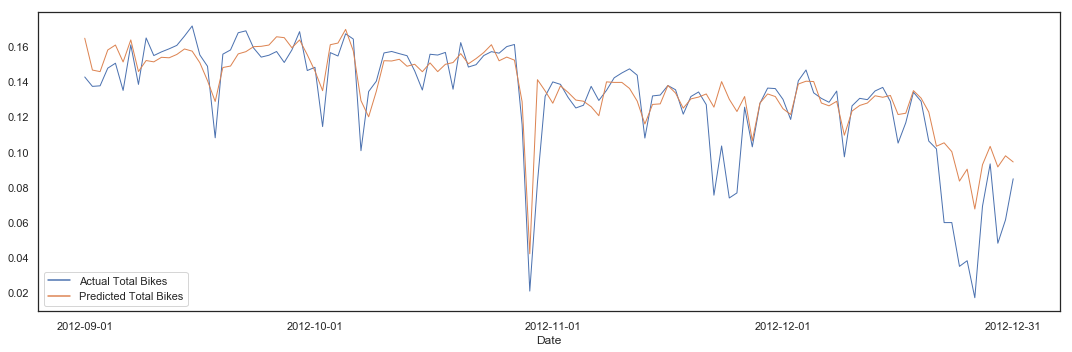

In [83]:
pipeline(hours_clean, 'total_bikes', lm, 10, plot = True)

In [84]:
hours_FE_sel = hours_clean.copy()

#### Day

The variable `day` is added to understand if patterns exist based on specific dates.

In [85]:
# Add the day from 'date'
hours_FE1 = pd.concat([hours_FE_sel,pd.DataFrame(pd.DatetimeIndex(hours_df['date']).day)], axis=1, sort=False, ignore_index=False)
hours_FE1.rename(columns={'date':'day'}, inplace=True)

# Encode feature
hours_FE1 = onehot_encode_single(hours_FE1, 'day')
df_desc(hours_FE1)

,dtype,NAs,Numerical,Boolean,Categorical,Date
actual_temp,float64,0,True,False,False,False
humidity,float64,0,True,False,False,False
windspeed,float64,0,True,False,False,False
total_bikes,float64,0,True,False,False,False
season_winter,uint8,0,False,True,False,False
season_spring,uint8,0,False,True,False,False
season_summer,uint8,0,False,True,False,False
season_fall,uint8,0,False,True,False,False
workingday_yes,uint8,0,False,True,False,False
weather_condition_clear,uint8,0,False,True,False,False


In [86]:
pipeline(hours_FE1, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  88 columns
Features Train:  14491 items |  88 columns
Features Test:    2888 items |  88 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.76

Intercept: [-1.44021302e+12]
Coefficients: [[ 9.83575808e-02 -2.72267992e-02 -1.97197751e-02 -5.36764741e+11
  -5.36764741e+11 -5.36764741e+11 -5.36764741e+11  1.06776546e-02
  -1.92256827e+11 -1.92256827e+11 -1.92256827e+11 -1.92256827e+11
   8.48308220e+11  8.48308220e+11  8.48308220e+11  8.48308220e+11
   8.48308220e+11  8.48308220e+11  8.48308220e+11 -9.85950415e+10
  -9.85950415e+10 -9.85950415e+10 -9.85950415e+10 -9.85950415e+10
  -9.85950415e+10 -9.85950415e+10 -9.85950415e+10 -9.85950415e+10
  -9.85950415e+10 -9.85950415e+10 -9.85950415e+10  1.

This additional feature gives the same result as the baseline, with a cross validation mean of 0.76 (0.75 for the baseline) and a metric of 0.76 (0.76 for the baseline). With the number of added variables and the lack of score improvement, we reject this feature.

#### Month-Day

The variable `month_day` is added to understand if patterns exist based on specific dates.

In [87]:
# Add month-day from 'date'
hours_FE2 = pd.concat([hours_FE_sel,pd.DataFrame(pd.DatetimeIndex(hours_df['date']).strftime('%m-%d'))], axis=1, sort=False, ignore_index=False)
hours_FE2.rename(columns={0:'month_day'}, inplace=True)

# Encode feature
hours_FE2 = onehot_encode_single(hours_FE2, 'month_day')
df_desc(hours_FE2)

,dtype,NAs,Numerical,Boolean,Categorical,Date
actual_temp,float64,0,True,False,False,False
humidity,float64,0,True,False,False,False
windspeed,float64,0,True,False,False,False
total_bikes,float64,0,True,False,False,False
season_winter,uint8,0,False,True,False,False
season_spring,uint8,0,False,True,False,False
season_summer,uint8,0,False,True,False,False
season_fall,uint8,0,False,True,False,False
workingday_yes,uint8,0,False,True,False,False
weather_condition_clear,uint8,0,False,True,False,False


In [88]:
pipeline(hours_FE2, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  423 columns
Features Train:  14491 items |  423 columns
Features Test:    2888 items |  423 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.78

Intercept: [1.78487685e+11]
Coefficients: [[ 1.09675628e-01 -3.07131044e-02 -1.01563532e-02 -7.39072559e+11
  -7.49551111e+11 -8.15680690e+11 -4.28785840e+11 -6.17184735e-04
   4.88902210e+11  4.88902210e+11  4.88902210e+11  4.88902210e+11
  -4.58125321e+11 -4.58125321e+11 -4.58125321e+11 -4.58125321e+11
  -4.58125321e+11 -4.58125321e+11 -4.58125321e+11  7.15273845e+11
   2.68612016e+11  3.61656818e+11  2.28516275e+11  1.32246024e+11
   1.04485227e+12  8.00601559e+11  5.87024753e+10  9.67493856e+09
   4.96432667e+11  1.78360939e+11  4.44393393e+11  

This additional feature gives a similar result than the baseline, with a cross validation mean of 0.78 (0.75 for the baseline) and a metric of 0.75 (0.76 for the baseline). With the number of added variables and the lack of score improvement, we reject this feature.

#### Calculated Peaks

The variable `calculated_peak` is added to flag the periods of typically high utilization.

In [89]:
hours_FE3 = hours_FE_sel.copy()

#Set threshold to mean(Total_Bikes)+th based on Trial and Error appraoch
th = 0.315

def calculated_peaks(row, th):
    if (row['total_bikes'] > (hours_FE3.total_bikes.mean()+ th *hours_FE3.total_bikes.mean())):
        return 1
    else:
        return 0

hours_FE3['calculated_peak'] = hours_FE3.apply(lambda row: calculated_peaks(row, th), axis=1)
hours_FE3.calculated_peak.value_counts()

0    11223
1     6156
Name: calculated_peak, dtype: int64

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  58 columns
Features Train:  14491 items |  58 columns
Features Test:    2888 items |  58 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.86

Intercept: [-5.1877058e+10]
Coefficients: [[ 5.59167213e-02 -1.42141033e-02 -6.92562926e-03  4.87151999e+10
   4.87151999e+10  4.87151999e+10  4.87151999e+10  8.28308985e-03
   2.35606896e+10  2.35606896e+10  2.35606896e+10  2.35606896e+10
  -9.21797599e+10 -9.21797599e+10 -9.21797599e+10 -9.21797599e+10
  -9.21797599e+10 -9.21797599e+10 -9.21797599e+10  2.40921840e+10
   2.40921840e+10  2.40921840e+10  2.40921840e+10  2.40921840e+10
   2.40921840e+10  2.40921840e+10  2.40921840e+10  2.40921840e+10
   2.40921840e+10  2.40921840e+10  2.40921840e+10  5.0

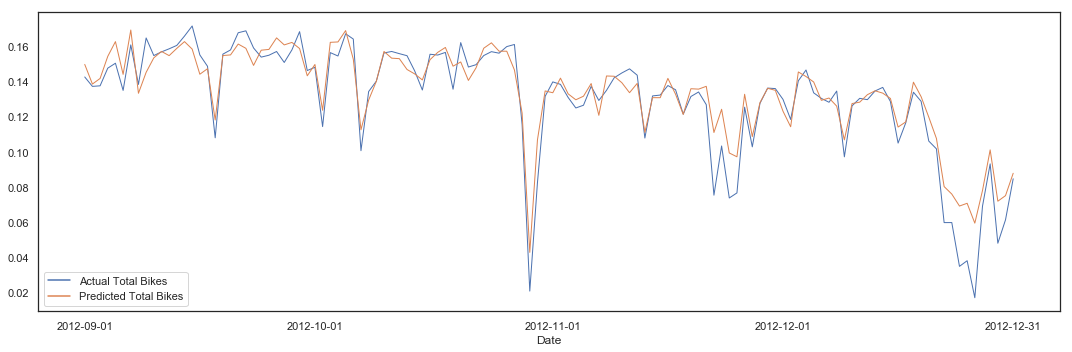

In [90]:
pipeline(hours_FE3, 'total_bikes', lm, 10, plot = True)

This additional feature significantly improves the score of the model, with a cross validation mean of 0.86 (0.75 for the baseline) and a metric of 0.87 (0.76 for the baseline). Thus, we accept this feature.

In [91]:
hours_FE_sel  = hours_FE3.copy()

#### Difference with Season Average Temperature

The variable `diff_season_avg_temp` is added to identify days with clement temperature compared to the seasonal average.

In [92]:
hours_FE4 = hours_FE_sel.copy()

def diff_season_avg_temp_calc(df, row):
    if (row['season_spring'] == 1):
        return row['actual_temp'] - df.actual_temp[df.season_spring == 1].mean()
    
    elif (row['season_winter'] == 1):
        return row['actual_temp'] - df.actual_temp[df.season_winter == 1].mean()
    
    elif (row['season_fall'] == 1):
        return row['actual_temp'] - df.actual_temp[df.season_fall == 1].mean()
    
    elif (row['season_summer'] == 1):
        return row['actual_temp'] - df.actual_temp[df.season_summer == 1].mean()
    
hours_FE4['diff_season_avg_temp'] = hours_FE4.apply(lambda row: diff_season_avg_temp_calc(hours_FE4, row), axis=1)

In [93]:
pipeline(hours_FE4, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  59 columns
Features Train:  14491 items |  59 columns
Features Test:    2888 items |  59 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.86

Intercept: [5.79334653e+11]
Coefficients: [[-5.96466420e+11 -1.43127441e-02 -4.11987305e-03 -6.99365712e+11
  -5.49934708e+11 -4.51489171e+11 -6.23899705e+11  8.05664062e-03
  -2.65995775e+11 -2.65995775e+11 -2.65995775e+11 -2.65995775e+11
   5.46317660e+11  5.46317660e+11  5.46317660e+11  5.46317660e+11
   5.46317660e+11  5.46317660e+11  5.46317660e+11 -2.06328528e+11
  -2.06328528e+11 -2.06328528e+11 -2.06328528e+11 -2.06328528e+11
  -2.06328528e+11 -2.06328528e+11 -2.06328528e+11 -2.06328528e+11
  -2.06328528e+11 -2.06328528e+11 -2.06328528e+11  1.2

This additional feature gives a similar result than the previously selected features, with a cross validation mean of 0.86 (0.86 for the previously selected features) and a metric of 0.87 (0.87 for the previously selected features). With no clear score improvement, we reject this feature.

#### Difference with Monthly Average Temperature

The variable `diff_month_avg_temp` is added to identify days with clement temperature compared to the monthly average.

In [94]:
hours_FE5 = hours_FE_sel.copy()

def diff_month_avg_temp_calc(df, row):
    if (row['month_jan'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_jan == 1].mean()
    
    elif (row['month_feb'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_feb == 1].mean()
    
    elif (row['month_mar'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_mar == 1].mean()
    
    elif (row['month_apr'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_apr == 1].mean()
    
    elif (row['month_may'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_may == 1].mean()
    
    elif (row['month_jun'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_jun == 1].mean()
    
    elif (row['month_jul'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_jul == 1].mean()
    
    elif (row['month_aug'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_aug == 1].mean()
    
    elif (row['month_sep'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_sep == 1].mean()
    
    elif (row['month_oct'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_oct == 1].mean()
    
    elif (row['month_nov'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_nov == 1].mean()
    
    elif (row['month_dec'] == 1):
        return row['actual_temp'] - df.actual_temp[df.month_dec == 1].mean()
    
hours_FE5['diff_month_avg_temp'] = hours_FE5.apply(lambda row: diff_month_avg_temp_calc(hours_FE5, row), axis=1)

In [95]:
pipeline(hours_FE5, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  59 columns
Features Train:  14491 items |  59 columns
Features Test:    2888 items |  59 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.86

Intercept: [5.85096076e+09]
Coefficients: [[ 6.36855364e+07 -1.41636878e-02 -6.96035102e-03 -2.20319370e+10
  -2.20319370e+10 -2.20319370e+10 -2.20319370e+10  8.23192485e-03
  -6.24282135e+08 -6.24282135e+08 -6.24282135e+08 -6.24282135e+08
   8.97986784e+09  8.97986784e+09  8.97986784e+09  8.97986784e+09
   8.97986784e+09  8.97986784e+09  8.97986784e+09  1.69741551e+09
   1.69335003e+09  1.68745625e+09  1.68231475e+09  1.67420606e+09
   1.66840295e+09  1.66376474e+09  1.66680380e+09  1.67279534e+09
   1.68119958e+09  1.68886664e+09  1.69179309e+09  5.6

This additional feature gives a similar result than the previously selected features, with a cross validation mean of 0.86 (0.86 for the previously selected features) and a metric of 0.87 (0.87 for the previously selected features). With no clear score improvement, we reject this feature.

#### Difference with Season Average Humidity

The variable `diff_season_avg_humi` is added to identify days with clement humidity compared to the seasonal average.

In [96]:
hours_FE6 = hours_FE_sel.copy()

def diff_season_avg_humi_calc(df, row):
    if (row['season_spring'] == 1):
        return row['humidity'] - df.humidity[df.season_spring == 1].mean()
    
    elif (row['season_winter'] == 1):
        return row['humidity'] - df.humidity[df.season_winter == 1].mean()
    
    elif (row['season_fall'] == 1):
        return row['humidity'] - df.humidity[df.season_fall == 1].mean()
    
    elif (row['season_summer'] == 1):
        return row['humidity'] - df.humidity[df.season_summer == 1].mean()
    
hours_FE6['diff_season_avg_humi'] = hours_FE6.apply(lambda row: diff_season_avg_humi_calc(hours_FE6, row), axis=1)

In [97]:
pipeline(hours_FE6, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  59 columns
Features Train:  14491 items |  59 columns
Features Test:    2888 items |  59 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.85

Intercept: [-7.78767882e+10]
Coefficients: [[ 5.60360490e-02  9.17342465e+10 -7.00860594e-03  2.76411853e+10
   2.34513539e+10  2.28876232e+10  1.97726005e+10  8.14104830e-03
   2.14454494e+10  2.14454494e+10  2.14454494e+10  2.14454494e+10
   8.79256730e+08  8.79256730e+08  8.79256730e+08  8.79256730e+08
   8.79256730e+08  8.79256730e+08  8.79256730e+08 -1.87871042e+10
  -1.87871042e+10 -1.87871042e+10 -1.87871042e+10 -1.87871042e+10
  -1.87871042e+10 -1.87871042e+10 -1.87871042e+10 -1.87871042e+10
  -1.87871042e+10 -1.87871042e+10 -1.87871042e+10 -6.

This additional feature gives a similar result than the previously selected features, with a cross validation mean of 0.86 (0.86 for the previously selected features) and a metric of 0.87 (0.87 for the previously selected features). With no clear score improvement, we reject this feature.

#### Difference with Monthly Average Humidity

The variable `diff_month_avg_humi` is added to identify days with clement humidity compared to the monthly average.

In [98]:
hours_FE7 = hours_FE_sel.copy()

def diff_month_avg_humi_calc(df, row):
    if (row['month_jan'] == 1):
        return row['humidity'] - df.humidity[df.month_jan == 1].mean()
    
    elif (row['month_feb'] == 1):
        return row['humidity'] - df.humidity[df.month_feb == 1].mean()
    
    elif (row['month_mar'] == 1):
        return row['humidity'] - df.humidity[df.month_mar == 1].mean()
    
    elif (row['month_apr'] == 1):
        return row['humidity'] - df.humidity[df.month_apr == 1].mean()
    
    elif (row['month_may'] == 1):
        return row['humidity'] - df.humidity[df.month_may == 1].mean()
    
    elif (row['month_jun'] == 1):
        return row['humidity'] - df.humidity[df.month_jun == 1].mean()
    
    elif (row['month_jul'] == 1):
        return row['humidity'] - df.humidity[df.month_jul == 1].mean()
    
    elif (row['month_aug'] == 1):
        return row['humidity'] - df.humidity[df.month_aug == 1].mean()
    
    elif (row['month_sep'] == 1):
        return row['humidity'] - df.humidity[df.month_sep == 1].mean()
    
    elif (row['month_oct'] == 1):
        return row['humidity'] - df.humidity[df.month_oct == 1].mean()
    
    elif (row['month_nov'] == 1):
        return row['humidity'] - df.humidity[df.month_nov == 1].mean()
    
    elif (row['month_dec'] == 1):
        return row['humidity'] - df.humidity[df.month_dec == 1].mean()
    
hours_FE7['diff_month_avg_humi'] = hours_FE7.apply(lambda row: diff_month_avg_humi_calc(hours_FE7, row), axis=1)

In [99]:
pipeline(hours_FE7, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  59 columns
Features Train:  14491 items |  59 columns
Features Test:    2888 items |  59 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.86

Intercept: [3.52789377e+10]
Coefficients: [[ 5.59456223e-02  3.32711915e+09 -6.72145267e-03 -3.28893913e+10
  -3.28893913e+10 -3.28893913e+10 -3.28893913e+10  8.31586057e-03
   1.52821843e+09  1.52821843e+09  1.52821843e+09  1.52821843e+09
   1.82954173e+09  1.82954173e+09  1.82954173e+09  1.82954173e+09
   1.82954173e+09  1.82954173e+09  1.82954173e+09 -5.52294453e+09
  -5.47729750e+09 -5.54995687e+09 -5.54684458e+09 -5.88236527e+09
  -5.50589249e+09 -5.57932464e+09 -5.71024935e+09 -5.96719147e+09
  -5.88413421e+09 -5.66971877e+09 -5.80636604e+09 -1.6

This additional feature gives a similar result than the previously selected features, with a cross validation mean of 0.86 (0.86 for the previously selected features) and a metric of 0.87 (0.87 for the previously selected features). With no clear score improvement, we reject this feature.

#### Polynomial Features

The polynomial variables `actual_temp_poly_2`, `actual_temp_poly_3`, `humidity_poly_2`, `humidity_poly_3`, `windspeed_poly_2`, `windspeed_poly_3` are added to identify potential polynomial relationship between the target and the corresponding variables.

In [100]:
hours_FE8 = hours_FE_sel.copy()
degree = 3
poly = PolynomialFeatures(degree)
list_var = ['actual_temp', 'humidity', 'windspeed']

def add_poly(df, degree, list_var):
    poly = PolynomialFeatures(degree)
    for var in list_var:
        poly_mat = poly.fit_transform(df[var].values.reshape(-1,1))
        for i in range(2, degree+1):
            df[var + '_poly_' + str(i)] = poly_mat[:,i]    

add_poly(hours_FE8, degree, list_var)

In [101]:
pipeline(hours_FE8, 'total_bikes', lm, 10)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  64 columns
Features Train:  14491 items |  64 columns
Features Test:    2888 items |  64 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.86

Intercept: [3.91665945e+11]
Coefficients: [[-3.21837527e-02  7.86094996e-02  7.84389214e-03 -3.30735878e+11
  -3.30735878e+11 -3.30735878e+11 -3.30735878e+11  7.82000425e-03
   2.56087040e+11  2.56087040e+11  2.56087040e+11  2.56087040e+11
   3.36995790e+11  3.36995790e+11  3.36995790e+11  3.36995790e+11
   3.36995790e+11  3.36995790e+11  3.36995790e+11  2.05939283e+10
   2.05939283e+10  2.05939283e+10  2.05939283e+10  2.05939283e+10
   2.05939283e+10  2.05939283e+10  2.05939283e+10  2.05939283e+10
   2.05939283e+10  2.05939283e+10  2.05939283e+10 -6.9

This additional feature gives a similar result than the previously selected features, with a cross validation mean of 0.86 (0.86 for the previously selected features) and a metric of 0.87 (0.87 for the previously selected features). With no clear score improvement, we reject this feature.

#### Hours Bins

The hour variables seem to be important for the model, but they are numerous. In order to reduce the number of variables, they will be binned into similar ranges.

In [102]:
hours_FE9 = hours_FE_sel.copy()

def bin_hours(row):
    if (row['hour_0'] == 1) | (row['hour_1'] == 1) | (row['hour_2'] == 1) | (row['hour_3'] == 1) :
        return '00-03'
    
    if (row['hour_4'] == 1) | (row['hour_5'] == 1) | (row['hour_6'] == 1) | (row['hour_7'] == 1) :
        return '04-07'
    
    if (row['hour_8'] == 1) | (row['hour_9'] == 1) | (row['hour_10'] == 1) | (row['hour_11'] == 1):
        return '08-11'
    
    if (row['hour_12'] == 1) | (row['hour_13'] == 1) | (row['hour_14'] == 1) | (row['hour_15'] == 1): 
        return '12-15'
    
    if (row['hour_16'] == 1) | (row['hour_17'] == 1) |(row['hour_18'] == 1) | (row['hour_19'] == 1):
        return '16-19'
    
    if (row['hour_20'] == 1) | (row['hour_21'] == 1) | (row['hour_22'] == 1) | (row['hour_23'] == 1):
        return '20-23'

hours_FE9['hours'] = hours_FE9.apply(lambda row: bin_hours(row), axis=1)
hours_FE9.hours.value_counts()

16-19    2916
12-15    2915
20-23    2912
08-11    2908
04-07    2866
00-03    2862
Name: hours, dtype: int64

In [103]:
hours_FE9 = onehot_encode_single(hours_FE9, 'hours')
hours_FE9.drop(['hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],axis=1, inplace=True)
df_desc(hours_FE9)

,dtype,NAs,Numerical,Boolean,Categorical,Date
actual_temp,float64,0,True,False,False,False
humidity,float64,0,True,False,False,False
windspeed,float64,0,True,False,False,False
total_bikes,float64,0,True,False,False,False
season_winter,uint8,0,False,True,False,False
season_spring,uint8,0,False,True,False,False
season_summer,uint8,0,False,True,False,False
season_fall,uint8,0,False,True,False,False
workingday_yes,uint8,0,False,True,False,False
weather_condition_clear,uint8,0,False,True,False,False


Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  40 columns
Features Train:  14491 items |  40 columns
Features Test:    2888 items |  40 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.81

Intercept: [7.44936557e+11]
Coefficients: [[ 4.84661351e-02 -1.24805381e-02 -2.61541362e-03 -6.47025613e+10
  -6.47025613e+10 -6.47025613e+10 -6.47025613e+10  8.20761956e-03
   2.95938796e+11  2.95938796e+11  2.95938796e+11  2.95938796e+11
   2.17478467e+11  2.17478467e+11  2.17478467e+11  2.17478467e+11
   2.17478467e+11  2.17478467e+11  2.17478467e+11 -9.89297816e+10
  -9.89297816e+10 -9.89297816e+10 -9.89297816e+10 -9.89297816e+10
  -9.89297816e+10 -9.89297816e+10 -9.89297816e+10 -9.89297816e+10
  -9.89297816e+10 -9.89297816e+10 -9.89297816e+10 -1.1

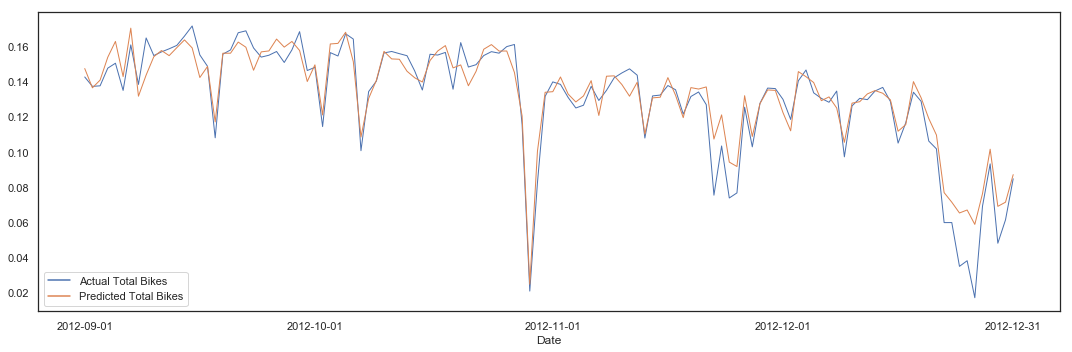

In [104]:
pipeline(hours_FE9, 'total_bikes', lm, 10, plot = True)

In [105]:
hours_FE_sel_lite = hours_FE9.copy()

This additional feature decreases slightly the results with the previously selected features, with a cross validation mean of 0.81 (0.86 for the previously selected features) and a metric of 0.83 (0.87 for the previously selected features). However, it decreases significantly the number of features from 59 to 40. The resulting dataset will be kept to be tested during the Features Selection phase.

### Features Selection

Dataset:   17379 rows |  59 columns

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  58 columns
Features Train:  14491 items |  58 columns
Features Test:    2888 items |  58 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Cross Validation Variance score (R2): 0.86

Intercept: [-5.1877058e+10]
Coefficients: [[ 5.59167213e-02 -1.42141033e-02 -6.92562926e-03  4.87151999e+10
   4.87151999e+10  4.87151999e+10  4.87151999e+10  8.28308985e-03
   2.35606896e+10  2.35606896e+10  2.35606896e+10  2.35606896e+10
  -9.21797599e+10 -9.21797599e+10 -9.21797599e+10 -9.21797599e+10
  -9.21797599e+10 -9.21797599e+10 -9.21797599e+10  2.40921840e+10
   2.40921840e+10  2.40921840e+10  2.40921840e+10  2.40921840e+10
   2.40921840e+10  2.40921840e+10  2.40921840e+10  2.40921840e+10
   2.40921840e+10

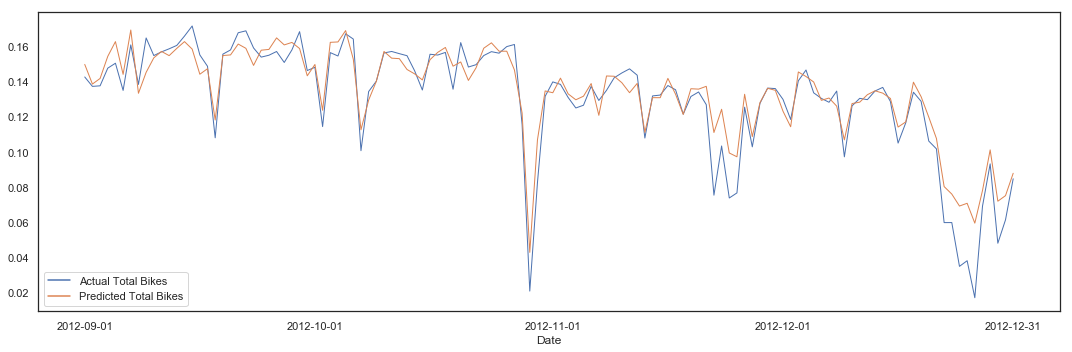

In [106]:
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('Dataset:', hours_FE_sel.shape[0],'rows |', hours_FE_sel.shape[1], 'columns'))
print()
pipeline(hours_FE_sel, 'total_bikes', lm, 10, plot = True)

The dataset resulting from the Feature Engineering phase contains 58 features, with a model reaching the accuracy of 0.87. The Feature Selection phase aims to reduce the number of variables used by the model.

#### Recursive Feature Elimination (Model A)

The Recursive Feature Elimination (RFE) method is used to select the most relevant features for the model. In order to find which number of features provides the best score, the dataset will be tested against each possibility.

In [107]:
def pipeline_rfe_multi(df, target, algorithm, range_def, scores):
    features = list_features(df, target)
    X, X_train, X_test, y, y_train, y_test = train_test_split_0(df, target, features)
    print('Iterations:')
    for i in range_def:
        rfe = RFE(algorithm, i)
        rfe = rfe.fit(X, y.values.ravel())
        
        cols_rfe = list(X.loc[:, rfe.support_])
        X_rfe_sel = X_train[cols_rfe]
        X_rfe_test_sel = X_test[cols_rfe]

        algorithm.fit(X_rfe_sel, y_train)
        y_pred = algorithm.predict(X_rfe_test_sel)
        
        result_model = [i, '{:.2f}'.format(r2_score(y_test, y_pred)), cols_rfe]
        scores.loc[i] = result_model
        print(i, end='   ')

In [108]:
scores = pd.DataFrame(columns=['features','score', 'cols'])
range_def = range(1, len(hours_FE_sel.columns))
pipeline_rfe_multi(hours_FE_sel, 'total_bikes', lm, range_def, scores)

Same indexes for X and y:                True
Same indexes for X_train and y_train:    True
Same indexes for X_test and y_test:      True

Features:        17379 items |  58 columns
Features Train:  14491 items |  58 columns
Features Test:    2888 items |  58 columns
Target:          17379 items |   1 columns
Target Train:    14491 items |   1 columns
Target Test:      2888 items |   1 columns

Iterations:
1   2   3   4   5   6   7   8   9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   

In [109]:
scores['features'] = scores['features'].astype('float')
scores['score'] = scores['score'].astype('float')

In [110]:
scores.to_csv('assets/scores/scores_FE_sel.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'assets/scores/scores_FE_sel.csv'

In [ ]:
# Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = scores['features'],
             y = scores['score'],
             color = 'steelblue')
plt.tight_layout()

In [ ]:
scores.nlargest(10, 'score')

In [ ]:
set(scores.iloc[57]['cols']) - set(scores.iloc[53]['cols'])

The RFE offers to reduce the number of features to 54 without degrading significantly the performance of the model. The numerical weather variables and the working day flag are the first ones to be dropped by the RFE algorithm for a score of 0.86.

In [ ]:
hours_FE_sel_afterRFE = hours_FE_sel.copy()

In [ ]:
hours_FE_sel_afterRFE.drop(['actual_temp', 'humidity', 'windspeed', 'workingday_yes'],axis=1, inplace=True)

In [ ]:
print('{:<9} {:>6} {:>6} {:>3} {:>6}'.format('Dataset:', hours_FE_sel_afterRFE.shape[0],'rows |', hours_FE_sel_afterRFE.shape[1], 'columns'))
print()
pipeline(hours_FE_sel_afterRFE, 'total_bikes', lm, 10, plot = True)

#### Recursive Feature Elimination on *Lite* Dataset

The *lite* version using the binned hours will be tested.

In [ ]:
scores_lite = pd.DataFrame(columns=['features','score', 'cols'])
range_def = range(1, len(hours_FE_sel_lite.columns))
pipeline_rfe_multi(hours_FE_sel_lite, 'total_bikes', lm, range_def, scores_lite)

In [ ]:
scores_lite['features'] = scores_lite['features'].astype('float')
scores_lite['score'] = scores_lite['score'].astype('float')

In [ ]:
scores_lite.to_csv('assets/scores/scores_FE_sel_lite.csv')

In [ ]:
# Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = scores_lite['features'],
             y = scores_lite['score'],
             color = 'steelblue')
plt.tight_layout()

In [ ]:
scores_lite.nlargest(10, 'score')

In [ ]:
set(scores_lite.iloc[39]['cols']) - set(scores_lite.iloc[35]['cols'])

The score can be 0.82 with only 36 features. The numerical weather variables and the working day flag are the first ones to be dropped by the RFE algorithm.

#### Manual Selection (Model B)

Some features seem to have a lower importance for the model. They will be manually removed from the dataset to see how the score gets degrated:  
- The meteorological features would simplify the inputs for the model, if removed. Thus, `actual_temp`, `humidity`, `windspeed` and the `weather_condition` categorical variables will be removed.  
- The `workingday_yes` variable is also removed, as it most of the time duplicates information already conveyed by the weekdays and predefined peak variables - it would need to compromise with a loss of performance on holidays.  
- The seasons variables also most of the time are doublons with the months variables - not using them would only sacrifice on some performance for the few weeks  

In [ ]:
hours_manual = hours_FE_sel.copy()
hours_manual.drop(['actual_temp', 'humidity', 'windspeed', 'weather_condition_clear',
                   'weather_condition_mist', 'weather_condition_light_rain', 'weather_condition_heavy_rain',
                   'workingday_yes',
                   'season_fall', 'season_summer', 'season_spring', 'season_winter'],axis=1, inplace=True)

In [ ]:
scores_manual = pd.DataFrame(columns=['features','score', 'cols'])
range_def = range(1, len(hours_manual.columns))
pipeline_rfe_multi(hours_manual, 'total_bikes', lm, range_def, scores_manual)

In [ ]:
scores_manual['features'] = scores_manual['features'].astype('float')
scores_manual['score'] = scores_manual['score'].astype('float')

In [ ]:
scores_manual.to_csv('assets/scores/scores_manual.csv')

In [ ]:
# Line Plot
plt.figure(figsize=(15,5))
sns.lineplot(x = scores_manual['features'],
             y = scores_manual['score'],
             color = 'steelblue')
plt.tight_layout()

In [ ]:
scores_manual.nlargest(10, 'score')

In [ ]:
set(scores_manual.iloc[45]['cols']) - set(scores_manual.iloc[44]['cols'])

In [ ]:
pipeline(hours_manual, 'total_bikes', lm, 10, plot=True)

Using a simpllified hours notation and keeping only information of time and peaks allow the model to reach a score of 0.85 with only 46 variables. It is also important to note that the additional feature describing the utilization peaks allow the score to jump from 0.59 to 0.85.

#### Manual Selection with Rain information

In [ ]:
hours_manual_rain = hours_FE_sel.copy()
hours_manual_rain.drop(['actual_temp', 'humidity', 'windspeed',
                        'workingday_yes',
                        'season_fall', 'season_summer', 'season_spring', 'season_winter'],axis=1, inplace=True)

In [ ]:
pipeline(hours_manual_rain, 'total_bikes', lm, 10, plot=True)

Adding back the rain information `weather_condition`, the model can integrate a simple weather input to slightly precise its predictions and reach a score of 0.86. The model now uses 50 features.

#### Manual Selection with Full Weather information

In [ ]:
hours_manual_full_weather = hours_FE_sel.copy()
hours_manual_full_weather.drop(['workingday_yes',
                                'season_fall', 'season_summer', 'season_spring', 'season_winter'],axis=1, inplace=True)

In [ ]:
pipeline(hours_manual_full_weather, 'total_bikes', lm, 10, plot=True)

If a more precise meteorological information is taken in account, the model keeps the score of 0.86 with 53 features.

## Final Metric

The Feature Selection phase suggested several acceptable models, which mainly differ on the number of features used and the resulting performance. Depending on the accuracy expected by the business, one of these models will be selected:  

1. Model with Time and Peaks information - Model B:  
Score: 0.85 | Features: 46    


2. Model with Time, Peaks and Rain information:  
Score: 0.86 | Features: 50  


3. Model with Time, Peaks and Full Weather information and Binned Hours:  
Score: 0.86 | Features: 53  


4. Complete Model with Binned Hours:  
Score: 0.82 | Features: 36  


5. Complete Model - Model A:  
Score: 0.86 | Features: 54  


Based on the predictions and the way they fit the actual values, the models A and B are preferable.

In [ ]:
def pipeline_short(df, target, algorithm, n_splits = 10, plot=True):
    
    features = list_features(df, target)
    X, X_train, X_test, y, y_train, y_test = train_test_split_0(df, target, features)
#     cross_val_ts(algorithm,X_train, y_train, n_splits)
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    y_test_prep = pd.concat([y_test,pd.DataFrame(pd.DatetimeIndex(hours_df['date']).strftime('%Y-%m-%d'))], axis=1, sort=False, ignore_index=False)
    y_test_prep = y_test_prep.dropna()
    y_test_prep = y_test_prep.set_index(0)
    y_pred_prep = pd.DataFrame(y_pred)
    y_total_prep = pd.concat([y_test_prep.reset_index(drop=False), y_pred_prep.reset_index(drop=True)], axis=1)
    y_total_prep.columns = ['Date', 'Actual Total Bikes', 'Predicted Total Bikes']
    y_total_prep = y_total_prep.set_index('Date')

#     print()
#     print('Intercept:', lm.intercept_)
#     print('Coefficients:', lm.coef_)
#     print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('Variance score (R2): {:.2f}'.format(r2_score(y_test, y_pred)))
        
    if (plot == True):
        plt.figure(figsize=(15,5))
        g = sns.lineplot(data=y_total_prep, ci=None, lw=1, dashes=False)
        g.set_xticks(['2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01', '2012-12-31'])
        g.legend(loc='lower left', ncol=1)
        plt.tight_layout()    

In [ ]:
print('#### Model A ####')
pipeline_short(hours_FE_sel_afterRFE, 'total_bikes', lm, 10, plot = True)

In [ ]:
print('#### Model B ####')
pipeline_short(hours_manual, 'total_bikes', lm, 10, plot=True)

The Model A is better at predicting the peaks, which would ensure there will be no shortage and a better service level for the users.  

The Model B is much more simple, as it doesn't consider the weather parameters. It is still a good model and seems to be more stable with less variations.  

**A conservative approach would prefer the Model A to provide the best service to the bike sharing service users.**

## Further Work

A couple of ideas to improve the models and get them ready for production:

- The `Calculated Peaks` feature should be set up to use a moving average instead of a global mean. It would allow the model to adapt to the latest trend, especially if the utilization gets higher every year.
- More exploration of the `Day` and `Month-Day` features might be possible, if using the elapsed percentage of the month or different periods such as 4-weeks periods, to adapt to the local practices.
- Other algorithms could be applied on top of the linear regression to improve the model score and get more precise predictions. However, the benefits from a very precise model would need to be evaluated, as it might not be relevant compared to the response time of the operations and logistics of the bike sharing system.  

***

*Vratul Kapur | Irune Maury Arrue | Paul Jacques-Mignault | Sheena Miles | Ashley O’Mahony | Stavros Tsentemeidis | Karl Westphal  
O17 (Group G) | Master in Big Data and Business Analytics | Oct 2018 Intake | IE School of Human Sciences and Technology*

***